In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/migrationwheredidtheygo/migration-flows.csv
/kaggle/input/naturaldisasters/natural-disasters.csv
/kaggle/input/populationgrowth/population-growth-rate-with-and-without-migration.csv
/kaggle/input/anomalies/annual-temperature-anomalies.csv
/kaggle/input/migrationtotalpercountry/migrant-stock-total.csv


Introduction
Bienvenue dans ce notebook dédié à l'analyse des flux de migration, des catastrophes climatiques et des coûts associés aux dégâts. Dans un contexte mondial de plus en plus affecté par le changement climatique, il est crucial de comprendre comment les phénomènes climatiques extrêmes influencent les mouvements de population et les coûts économiques associés.

Objectifs
Ce notebook a plusieurs objectifs principaux :

Analyser les flux de migration : Comprendre les tendances des mouvements de population à travers différentes régions et périodes.
Étudier les catastrophes climatiques 
Évaluer les coûts des dégâts : Estimer les impacts économiques des catastrophes climatiques en termes de coûts directs et indirects.
Méthodologie
Pour atteindre ces objectifs, nous allons utiliser une combinaison de techniques d'analyses exploratoires des données (EDA) et de modèles de machine learning. Voici un aperçu des étapes clés :

Collecte et Préparation des Données :

Importer et nettoyer les données relatives aux flux de migration, aux catastrophes climatiques et aux coûts des dégâts.
Fusionner les différentes sources de données pour obtenir un ensemble de données cohérent.
Analyses Exploratoires des Données (EDA) :

Visualiser les tendances des flux de migration et des catastrophes climatiques.
Utiliser des matrices de corrélation pour identifier les relations entre les variables.
Créer des plots pour mieux comprendre la distribution et la variation des données.
Modélisation :

Utiliser des modèles de régression linéaire pour prédire les coûts des dégâts en fonction des caractéristiques des catastrophes climatiques.
Appliquer des modèles ARIMA pour analyser les séries temporelles des flux de migration.
Utiliser des forêts aléatoires pour identifier les principaux facteurs influençant  les flux de migration.
Évaluation et Interprétation des Modèles :

Structure du Notebook
Introduction et Objectifs : Présentation des objectifs et de la méthodologie.
Collecte et Préparation des Données : Description des sources de données et des étapes de préparation.
Analyses Exploratoires des Données (EDA) : Visualisation et compréhension des données.
Modélisation :
Modèles de Régression Linéaire
Modèles ARIMA pour les Séries Temporelles
Modèles de Forêts Aléatoires
Évaluation des Modèles : Comparaison et interprétation des performances des modèles.

In [20]:
import pandas as pd

# Charger les données à partir d'un fichier CSV
df = pd.read_csv('/kaggle/input/populationgrowth/population-growth-rate-with-and-without-migration.csv')

# Afficher les premières lignes du DataFrame pour comprendre sa structure
print(df.head())

# Vérifier les informations sur le DataFrame, y compris les types de données et les valeurs manquantes
print(df.info())

# Résumé statistique des colonnes numériques
print(df.describe())

        Entity Code  Year  \
0  Afghanistan  AFG  1950   
1  Afghanistan  AFG  1951   
2  Afghanistan  AFG  1952   
3  Afghanistan  AFG  1953   
4  Afghanistan  AFG  1954   

   Growth rate - Sex: all - Age: all - Variant: estimates  \
0                                               1.17        
1                                               1.25        
2                                               1.27        
3                                               1.24        
4                                               1.31        

   Natural growth rate - Sex: all - Age: all - Variant: estimates  
0                                               1.09               
1                                               1.18               
2                                               1.27               
3                                               1.35               
4                                               1.40               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

        Entity Code  Year  \
0  Afghanistan  AFG  1950   
1  Afghanistan  AFG  1951   
2  Afghanistan  AFG  1952   
3  Afghanistan  AFG  1953   
4  Afghanistan  AFG  1954   

   Growth rate - Sex: all - Age: all - Variant: estimates  \
0                                               1.17        
1                                               1.25        
2                                               1.27        
3                                               1.24        
4                                               1.31        

   Natural growth rate - Sex: all - Age: all - Variant: estimates  
0                                               1.09               
1                                               1.18               
2                                               1.27               
3                                               1.35               
4                                               1.40               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

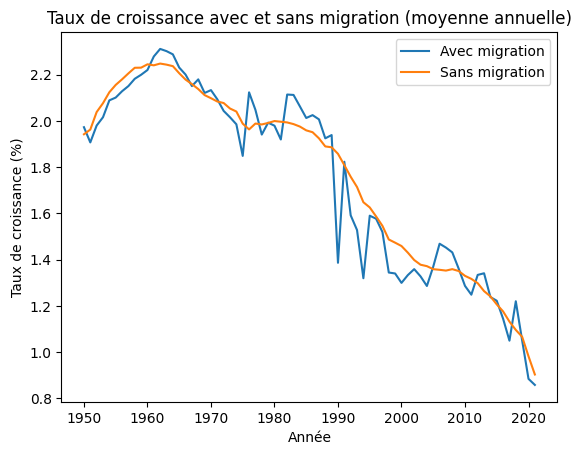

In [21]:
import pandas as pd

# Charger les données à partir d'un fichier CSV
df = pd.read_csv('/kaggle/input/populationgrowth/population-growth-rate-with-and-without-migration.csv')

# Afficher les premières lignes du DataFrame pour comprendre sa structure
print(df.head())

# Vérifier les informations sur le DataFrame, y compris les types de données et les valeurs manquantes
print(df.info())

# Résumé statistique des colonnes numériques
print(df.describe())

# Renommer les colonnes pour les rendre plus faciles à manipuler
df = df.rename(columns={
    'Growth rate - Sex: all - Age: all - Variant: estimates': 'Growth_rate',
    'Natural growth rate - Sex: all - Age: all - Variant: estimates': 'Natural_growth_rate'
})

# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Gérer les valeurs manquantes (ici, on choisit de supprimer les lignes avec des valeurs manquantes)
df = df.dropna()

# Afficher les informations après le nettoyage
print(df.info())

# Comparaison des taux de croissance avec et sans migration
import matplotlib.pyplot as plt

# Tracer les taux de croissance moyen avec et sans migration par année
df.groupby('Year')[['Growth_rate', 'Natural_growth_rate']].mean().plot()
plt.title('Taux de croissance avec et sans migration (moyenne annuelle)')
plt.xlabel('Année')
plt.ylabel('Taux de croissance (%)')
plt.legend(['Avec migration', 'Sans migration'])
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 5400 to 5471
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               72 non-null     object 
 1   Code                 72 non-null     object 
 2   Year                 72 non-null     int64  
 3   Growth_rate          72 non-null     float64
 4   Natural_growth_rate  72 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.4+ KB
None


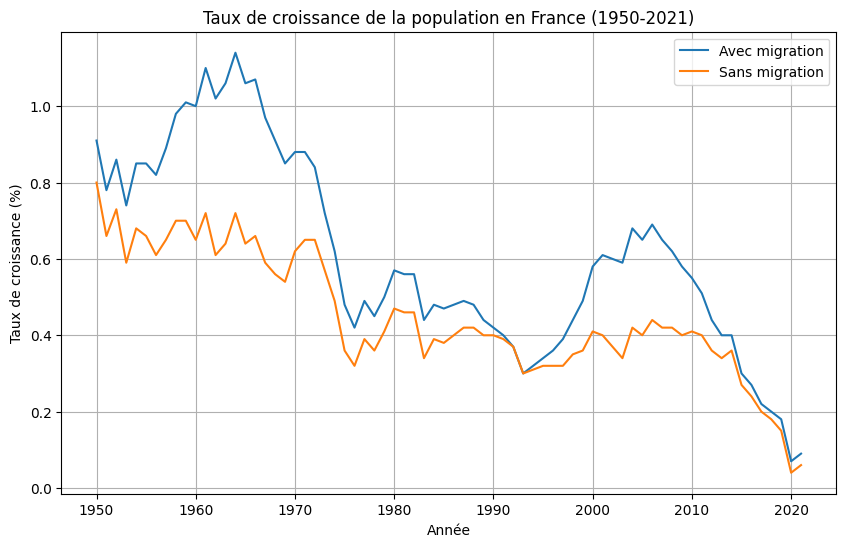

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données à partir d'un fichier CSV
df = pd.read_csv('/kaggle/input/populationgrowth/population-growth-rate-with-and-without-migration.csv')

# Renommer les colonnes pour les rendre plus faciles à manipuler
df = df.rename(columns={
    'Growth rate - Sex: all - Age: all - Variant: estimates': 'Growth_rate',
    'Natural growth rate - Sex: all - Age: all - Variant: estimates': 'Natural_growth_rate'
})

# Filtrer les données pour la France
df_france = df[df['Entity'] == 'France']

# Vérifier les informations sur les données filtrées
print(df_france.info())

# Tracer les taux de croissance avec et sans migration pour la France
plt.figure(figsize=(10, 6))
plt.plot(df_france['Year'], df_france['Growth_rate'], label='Avec migration')
plt.plot(df_france['Year'], df_france['Natural_growth_rate'], label='Sans migration')
plt.title('Taux de croissance de la population en France (1950-2021)')
plt.xlabel('Année')
plt.ylabel('Taux de croissance (%)')
plt.legend()
plt.grid(True)
plt.show()


# Explication du graphique
Le graphique montre les taux de croissance de la population en France avec et sans migration de 1950 à 2021. Voici quelques observations :

Tendance Générale :
Les deux courbes montrent une tendance à la baisse sur la période, indiquant un ralentissement du taux de croissance de la population.
Différences entre les deux courbes :
Le taux de croissance avec migration est généralement supérieur au taux de croissance sans migration, ce qui montre l'impact positif de la migration sur la croissance de la population.
Dans les années 60, on observe des pics dans le taux de croissance avec migration, ce qui peut être dû à des vagues de migration importantes durant cette période.
Réduction des différences :
Vers les années récentes (après 2000), les courbes se rapprochent, ce qui pourrait indiquer une réduction de l'impact de la migration sur le taux de croissance global.

# Algoritme de predictions

Erreur quadratique moyenne (MSE) : 0.000551588666666669
Coefficient de détermination (R^2) : 0.990381951548405


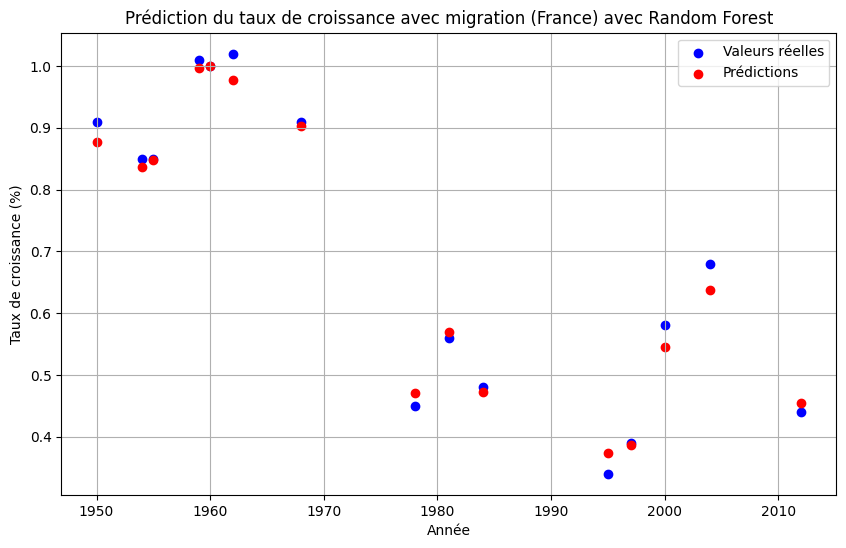

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données à partir d'un fichier CSV
df = pd.read_csv('/kaggle/input/populationgrowth/population-growth-rate-with-and-without-migration.csv')

# Renommer les colonnes pour les rendre plus faciles à manipuler
df = df.rename(columns={
    'Growth rate - Sex: all - Age: all - Variant: estimates': 'Growth_rate',
    'Natural growth rate - Sex: all - Age: all - Variant: estimates': 'Natural_growth_rate'
})

# Filtrer les données pour la France
df_france = df[df['Entity'] == 'France']

# Préparation des données pour la régression
X = df_france[['Year', 'Natural_growth_rate']]
y = df_france['Growth_rate']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erreur quadratique moyenne (MSE) : {mse}')
print(f'Coefficient de détermination (R^2) : {r2}')

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Year'], y_test, color='blue', label='Valeurs réelles')
plt.scatter(X_test['Year'], y_pred, color='red', label='Prédictions')
plt.title('Prédiction du taux de croissance avec migration (France) avec Random Forest')
plt.xlabel('Année')
plt.ylabel('Taux de croissance (%)')
plt.legend()
plt.grid(True)
plt.show()


# Explication des résultats
Le graphique montre les prédictions du taux de croissance de la population en France avec migration comparées aux valeurs réelles sur la période de 1950 à 2021 en utilisant un modèle de régression Random Forest. Voici comment interpréter ce que vous voyez :

Points Bleus (Valeurs Réelles) :

Ces points représentent les taux de croissance réels mesurés pour chaque année dans le jeu de données de test.
Points Rouges (Prédictions) :

Ces points représentent les taux de croissance prévus par le modèle de régression Random Forest pour les mêmes années.
Performance du Modèle :

Erreur Quadratique Moyenne (MSE) : 0.0005515886666666669
Cette valeur indique la moyenne des carrés des erreurs (différences entre les valeurs réelles et prédites). Une valeur proche de 0 signifie que le modèle est très précis.
Coefficient de Détermination (R²) : 0.990381951548405
Cette valeur indique la proportion de la variance dans les données cibles qui est expliquée par les caractéristiques d'entrée du modèle. Une valeur proche de 1 signifie que le modèle explique presque toute la variabilité des données.
Interprétation des Résultats
Le modèle Random Forest prédit les taux de croissance de manière très précise, comme indiqué par le R² élevé et le faible MSE. Les points rouges sont souvent très proches des points bleus, montrant que les prédictions sont très proches des valeurs réelles.

Comment Fonctionne le Modèle Random Forest
Ensemble de Modèles :

Le Random Forest est un ensemble de nombreux arbres de décision individuels. Chaque arbre de décision est entraîné sur un sous-ensemble aléatoire des données et des caractéristiques.
Agrégation des Prédictions :

Les prédictions finales du modèle sont obtenues en moyennant les prédictions de tous les arbres de la forêt. Cela réduit la variance et améliore la précision des prédictions.
Robustesse :

En combinant les prédictions de nombreux arbres, le modèle Random Forest est capable de capturer des relations complexes et non linéaires dans les données tout en étant robuste aux erreurs individuelles des arbres.

# Where did they move to?

In [24]:
import pandas as pd

# Cargar el archivo CSV
file_path = '/kaggle/input/migrationwheredidtheygo/migration-flows.csv'
df = pd.read_csv(file_path)


# Mostrar los datos procesados
df.head()


,Year,Country,Emigrants from Afghanistan,Immigrants to Afghanistan,Emigrants from Albania,Immigrants to Albania,Emigrants from Algeria,Immigrants to Algeria,Emigrants from American Samoa,Immigrants to American Samoa,...,Emigrants from Zimbabwe,Immigrants to Zimbabwe,cotedivoire_destination,micronesiacountry_destination,saintmartinfrenchpart_destination,sintmaartendutchpart_destination,cotedivoire_origin,micronesiacountry_origin,saintmartinfrenchpart_origin,sintmaartendutchpart_origin
0,1990,Afghanistan,-7679582.0,57686.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
1,1995,Afghanistan,-4347049.0,71522.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
2,2000,Afghanistan,-4750677.0,75917.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
3,2005,Afghanistan,-4116739.0,87314.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
4,2010,Afghanistan,-5269518.0,102276.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN


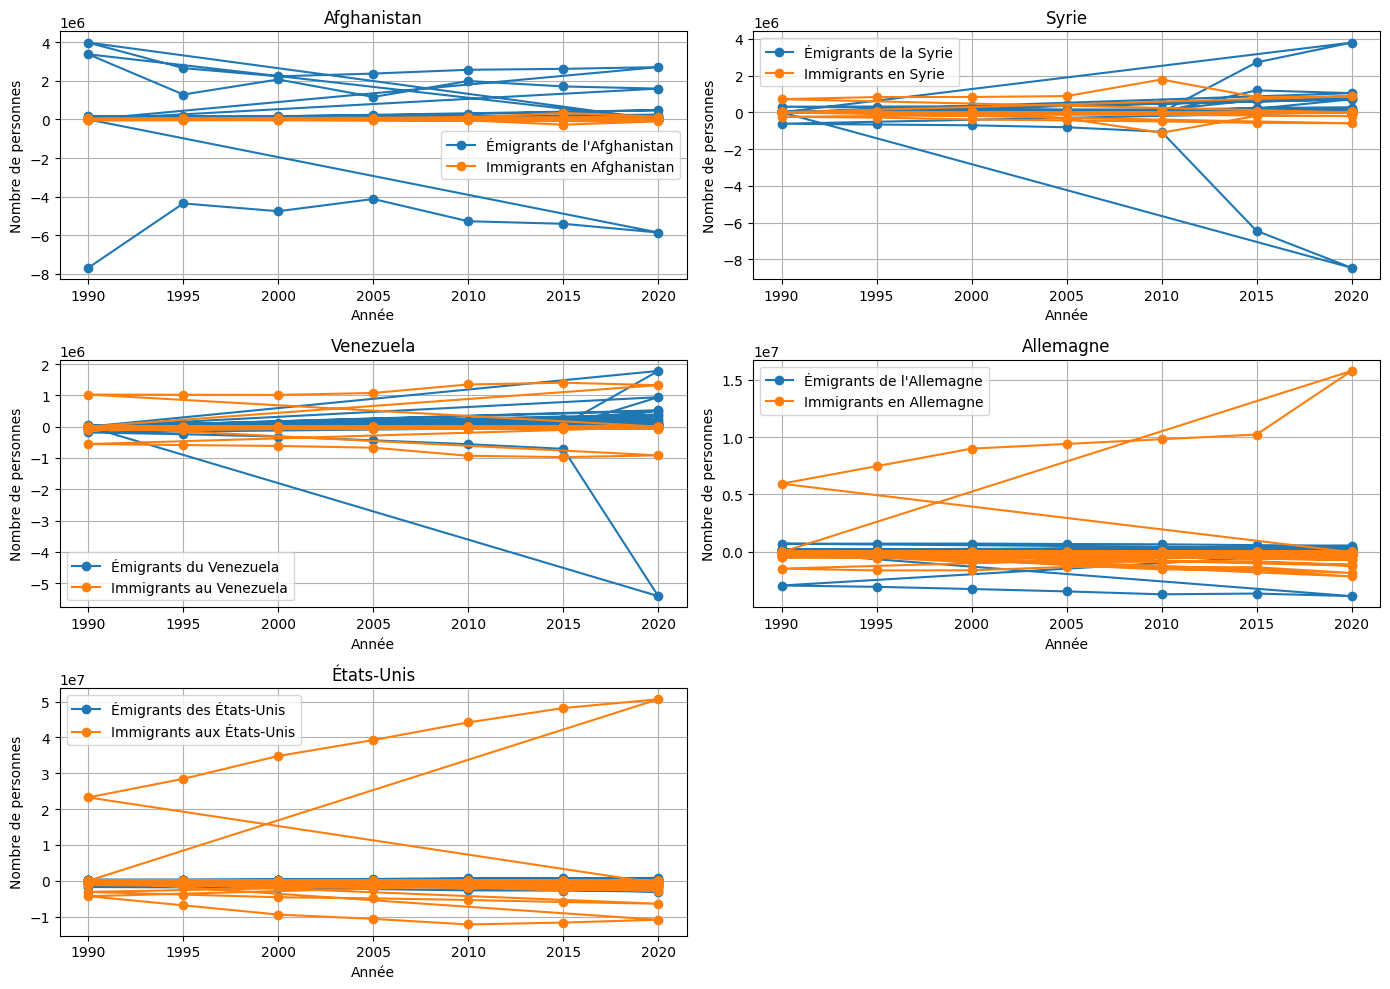

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = '/kaggle/input/migrationwheredidtheygo/migration-flows.csv'
data = pd.read_csv(file_path)

# Remplacer les valeurs manquantes par 0 pour les colonnes numériques
data.fillna(0, inplace=True)

# Sélection des pays d'intérêt
years = data['Year']

# Afghanistan
emigrants_afghanistan = data['Emigrants from Afghanistan']
immigrants_afghanistan = data['Immigrants to Afghanistan']

# Syrie
emigrants_syria = data['Emigrants from Syria']
immigrants_syria = data['Immigrants to Syria']

# Venezuela
emigrants_venezuela = data['Emigrants from Venezuela']
immigrants_venezuela = data['Immigrants to Venezuela']

# Allemagne
emigrants_germany = data['Emigrants from Germany']
immigrants_germany = data['Immigrants to Germany']

# États-Unis
emigrants_usa = data['Emigrants from United States']
immigrants_usa = data['Immigrants to United States']

# Créer des graphiques pour chaque pays d'intérêt
plt.figure(figsize=(14, 10))

# Afghanistan
plt.subplot(3, 2, 1)
plt.plot(years, emigrants_afghanistan, label='Émigrants de l\'Afghanistan', marker='o')
plt.plot(years, immigrants_afghanistan, label='Immigrants en Afghanistan', marker='o')
plt.title('Afghanistan')
plt.xlabel('Année')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.grid(True)

# Syrie
plt.subplot(3, 2, 2)
plt.plot(years, emigrants_syria, label='Émigrants de la Syrie', marker='o')
plt.plot(years, immigrants_syria, label='Immigrants en Syrie', marker='o')
plt.title('Syrie')
plt.xlabel('Année')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.grid(True)

# Venezuela
plt.subplot(3, 2, 3)
plt.plot(years, emigrants_venezuela, label='Émigrants du Venezuela', marker='o')
plt.plot(years, immigrants_venezuela, label='Immigrants au Venezuela', marker='o')
plt.title('Venezuela')
plt.xlabel('Année')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.grid(True)

# Allemagne
plt.subplot(3, 2, 4)
plt.plot(years, emigrants_germany, label='Émigrants de l\'Allemagne', marker='o')
plt.plot(years, immigrants_germany, label='Immigrants en Allemagne', marker='o')
plt.title('Allemagne')
plt.xlabel('Année')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.grid(True)

# États-Unis
plt.subplot(3, 2, 5)
plt.plot(years, emigrants_usa, label='Émigrants des États-Unis', marker='o')
plt.plot(years, immigrants_usa, label='Immigrants aux États-Unis', marker='o')
plt.title('États-Unis')
plt.xlabel('Année')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Chaque sous-graphe affiche les flux d'émigrants et d'immigrants pour un pays spécifique, avec les années en abscisse (axe X) et le nombre de personnes en ordonnée (axe Y).
Les courbes des émigrants et des immigrants sont tracées avec des marqueurs 'o' pour une meilleure lisibilité.
Les sous-graphiques comprennent des titres spécifiques à chaque pays, des légendes pour distinguer les émigrants des immigrants, et des grilles pour faciliter la lecture des données.
Affichage des Graphiques :
La méthode tight_layout() de matplotlib est utilisée pour ajuster l'espacement entre les sous-graphiques et améliorer la présentation globale. Finalement, la figure est affichée à l'écran à l'aide de plt.show().

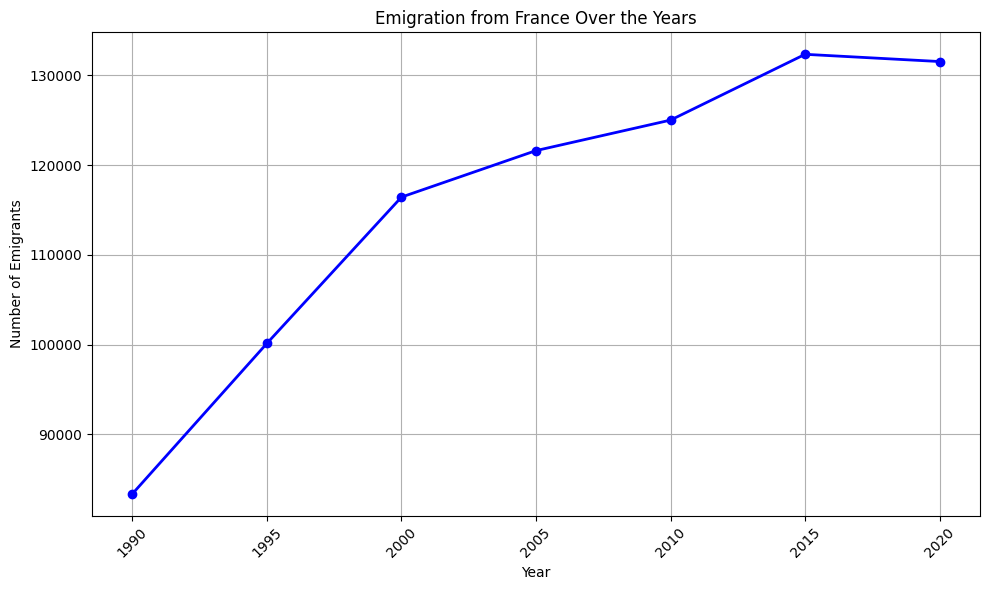

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = '/kaggle/input/migrationwheredidtheygo/migration-flows.csv'
df  = pd.read_csv(file_path)

 # Filtrar las columnas relevantes para Francia
df_france = df[['Year', 'Emigrants from France']]

# Agrupar por año y sumar los emigrantes
df_france_total = df_france.groupby('Year')['Emigrants from France'].sum().reset_index()

# Preparar los datos para el gráfico de líneas
years = df_france_total['Year']
emigrants = df_france_total['Emigrants from France']

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(years, emigrants, marker='o', linestyle='-', color='b', linewidth=2)
plt.title('Emigration from France Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

   Year  Immigrants to France
0  1990               31193.0
1  1995               32208.0
2  2000               33211.0
3  2005               89016.0
4  2010               89439.0
5  2015               99120.0
6  2020              108921.0


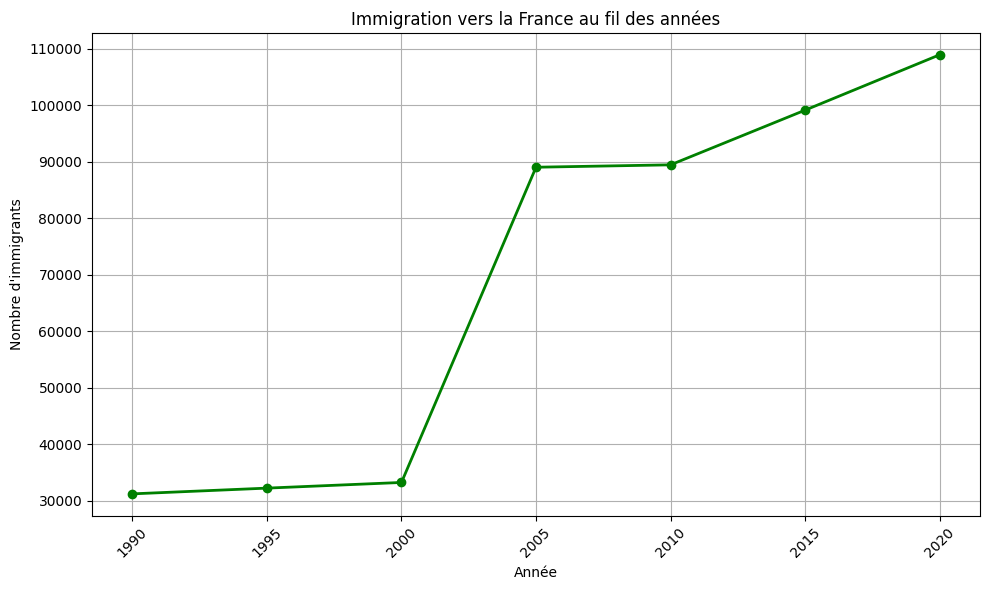

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df est votre dataframe contenant toutes les données

# Filtrer les colonnes pertinentes pour la France
df_france = df[['Year', 'Immigrants to France']]

# Grouper par année et sum des immigrants
df_france_total = df_france.groupby('Year')['Immigrants to France'].sum().reset_index()

# Convertir les valeurs négatives en positives
df_france_total['Immigrants to France'] = df_france_total['Immigrants to France'].abs()

# Imprimer le dataframe mis à jour
print(df_france_total)

# Préparer les données pour le graphique de lignes
years = df_france_total['Year']
immigrants = df_france_total['Immigrants to France']

# Créer le graphique de lignes
plt.figure(figsize=(10, 6))
plt.plot(years, immigrants, marker='o', linestyle='-', color='g', linewidth=2)
plt.title('Immigration vers la France au fil des années')
plt.xlabel('Année')
plt.ylabel('Nombre d\'immigrants')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

# FRANCE flux migratoire

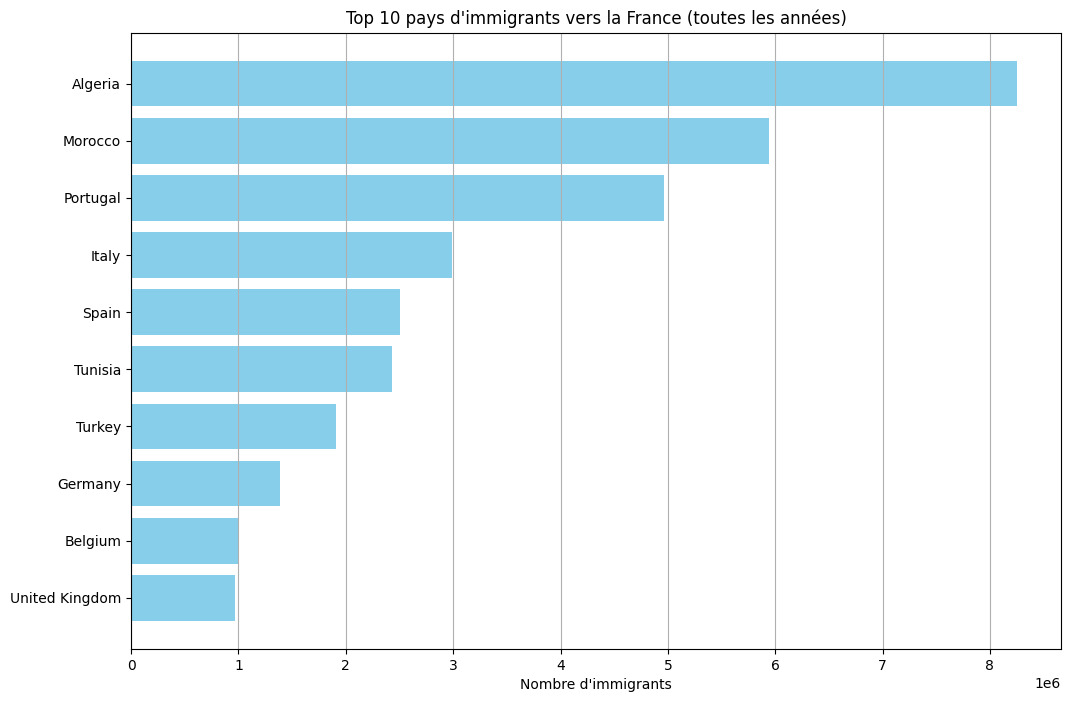

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = '/kaggle/input/migrationwheredidtheygo/migration-flows.csv'  # Assurez-vous de mettre à jour le chemin du fichier
df = pd.read_csv(file_path)

# Filtrer les colonnes pertinentes pour la France
france_columns = [col for col in df.columns if 'France' in col]
df_france = df[['Year', 'Country'] + france_columns]

# Calculer le total des immigrants en France par pays et année
df_france_total = df_france.groupby(['Year', 'Country'])['Immigrants to France'].sum().reset_index()

# Convertir les valeurs négatives en positives
df_france_total['Immigrants to France'] = df_france_total['Immigrants to France'].abs()

# Exclure les données de la France (migration interne)
df_france_total = df_france_total[df_france_total['Country'] != 'France']

# Calculer le total des immigrants par pays pour toutes les années disponibles
df_top_countries_all_years = df_france_total.groupby('Country')['Immigrants to France'].sum().reset_index()

# Trier les pays par le nombre total d'immigrants et sélectionner les 10 premiers
top_10_countries_all_years = df_top_countries_all_years.sort_values(by='Immigrants to France', ascending=False).head(10)

# Préparer les données pour le graphique
countries = top_10_countries_all_years['Country']
immigrants = top_10_countries_all_years['Immigrants to France']

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
plt.barh(countries, immigrants, color='skyblue')
plt.xlabel('Nombre d\'immigrants')
plt.title('Top 10 pays d\'immigrants vers la France (toutes les années)')
plt.gca().invert_yaxis()  # Inverser l'axe y pour montrer le pays avec le plus d'immigrants en haut
plt.grid(axis='x')

# Afficher le graphique
plt.show()


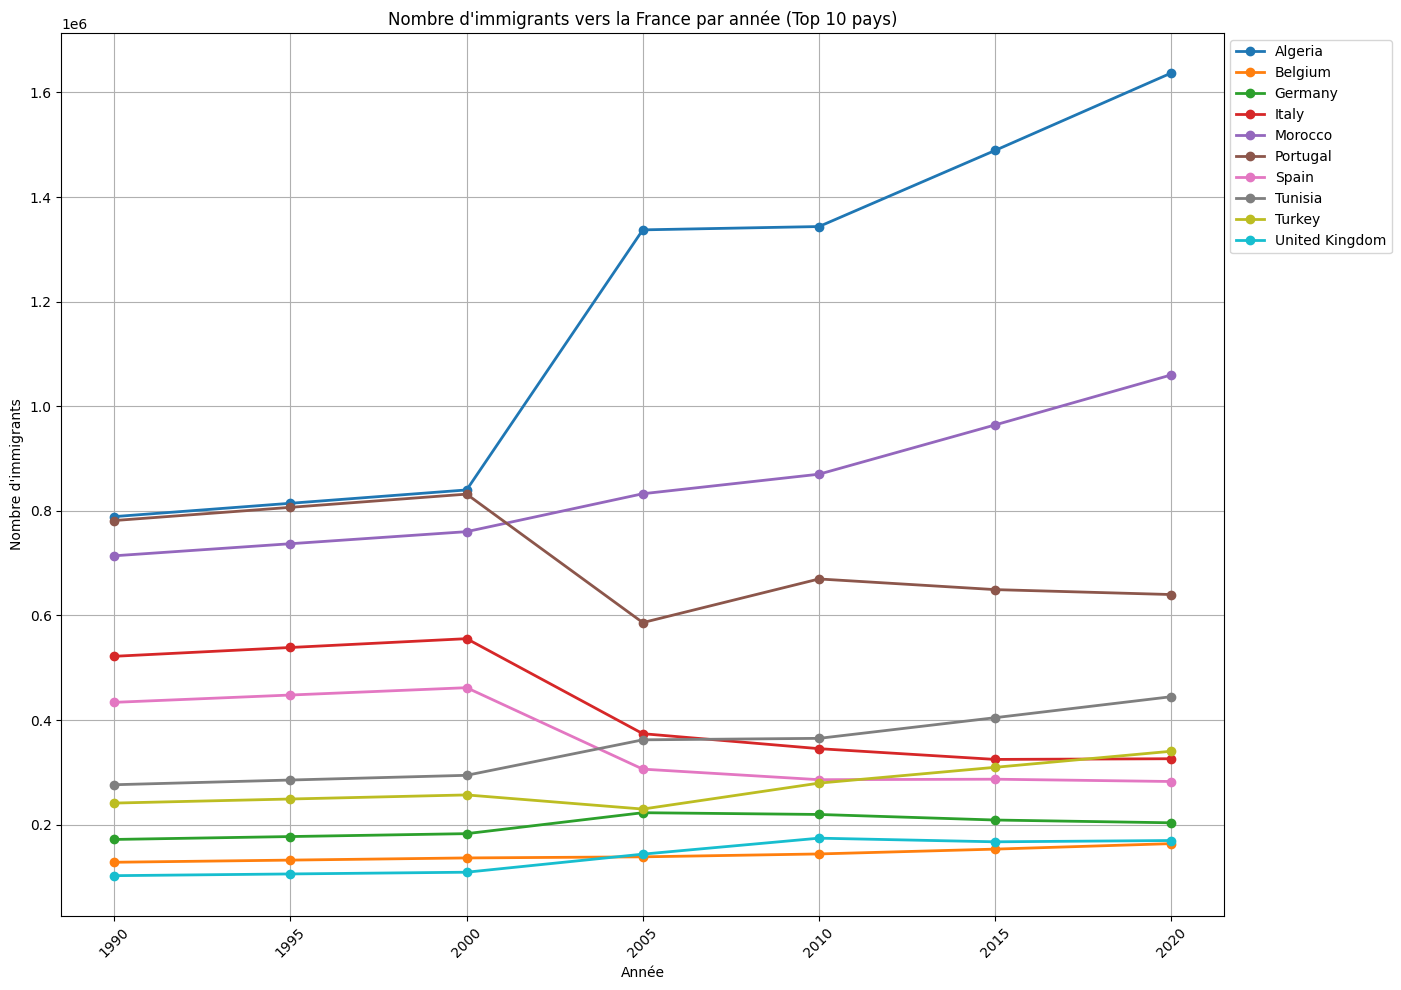

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = '/kaggle/input/migrationwheredidtheygo/migration-flows.csv'  # Assurez-vous de mettre à jour le chemin du fichier
df = pd.read_csv(file_path)

# Filtrer les colonnes pertinentes pour la France
france_columns = [col for col in df.columns if 'France' in col]
df_france = df[['Year', 'Country'] + france_columns]

# Calculer le total des immigrants en France par pays et année
df_france_total = df_france.groupby(['Year', 'Country'])['Immigrants to France'].sum().reset_index()

# Convertir les valeurs négatives en positives
df_france_total['Immigrants to France'] = df_france_total['Immigrants to France'].abs()

# Exclure les données de la France (migration interne)
df_france_total = df_france_total[df_france_total['Country'] != 'France']

# Filtrer les 10 pays avec le plus d'immigrants en France
top_10_countries_all_years = df_france_total.groupby('Country')['Immigrants to France'].sum().reset_index().sort_values(by='Immigrants to France', ascending=False).head(10)['Country'].tolist()
df_top_10_countries_per_year = df_france_total[df_france_total['Country'].isin(top_10_countries_all_years)]

# Obtenir les données par pays et année pour les 10 principaux pays
df_top_10_by_country_year = df_top_10_countries_per_year.groupby(['Year', 'Country'])['Immigrants to France'].sum().unstack().fillna(0)

# Créer le graphique de lignes pour les 10 principaux pays
plt.figure(figsize=(14, 10))

for country in df_top_10_by_country_year.columns:
    plt.plot(df_top_10_by_country_year.index, df_top_10_by_country_year[country], marker='o', linestyle='-', linewidth=2, label=country)

plt.title('Nombre d\'immigrants vers la France par année (Top 10 pays)')
plt.xlabel('Année')
plt.ylabel('Nombre d\'immigrants')
plt.grid(True)
plt.xticks(df_top_10_by_country_year.index, rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=1)  # Ajuster la position de la légende
plt.tight_layout()

# Afficher le graphique
plt.show()


# ITALIE 
# 

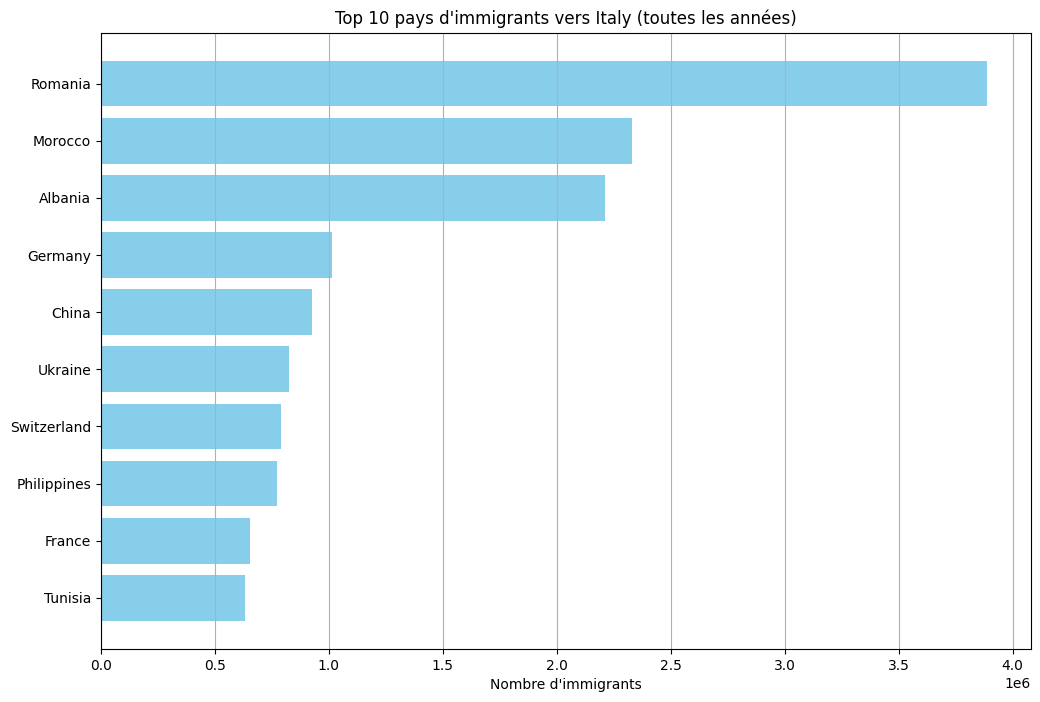

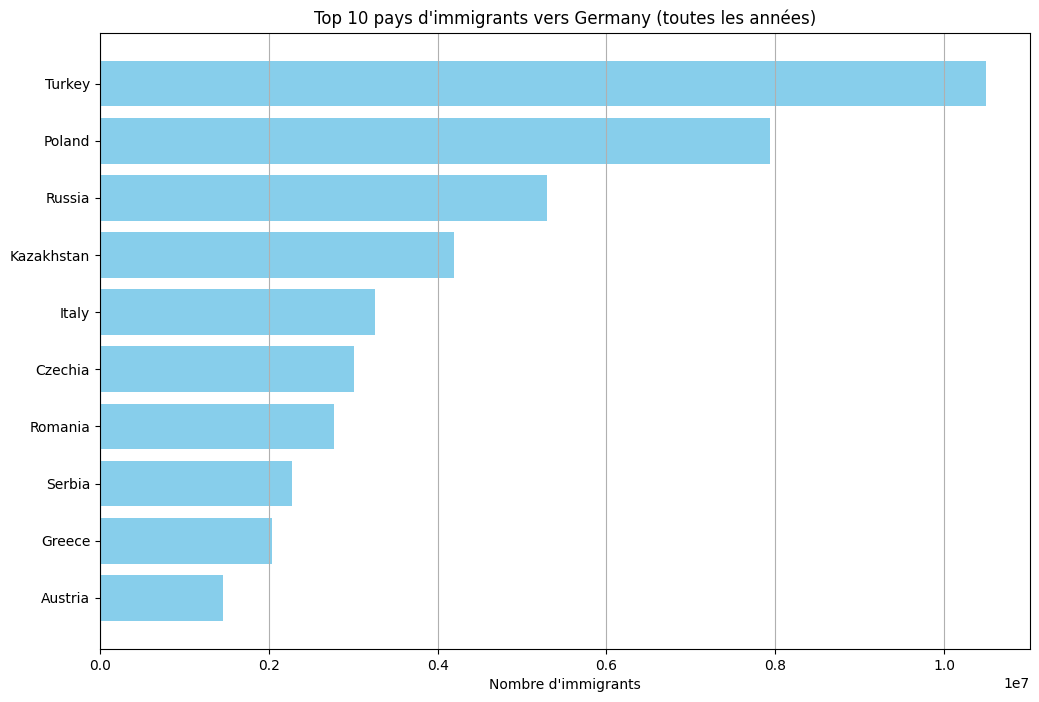

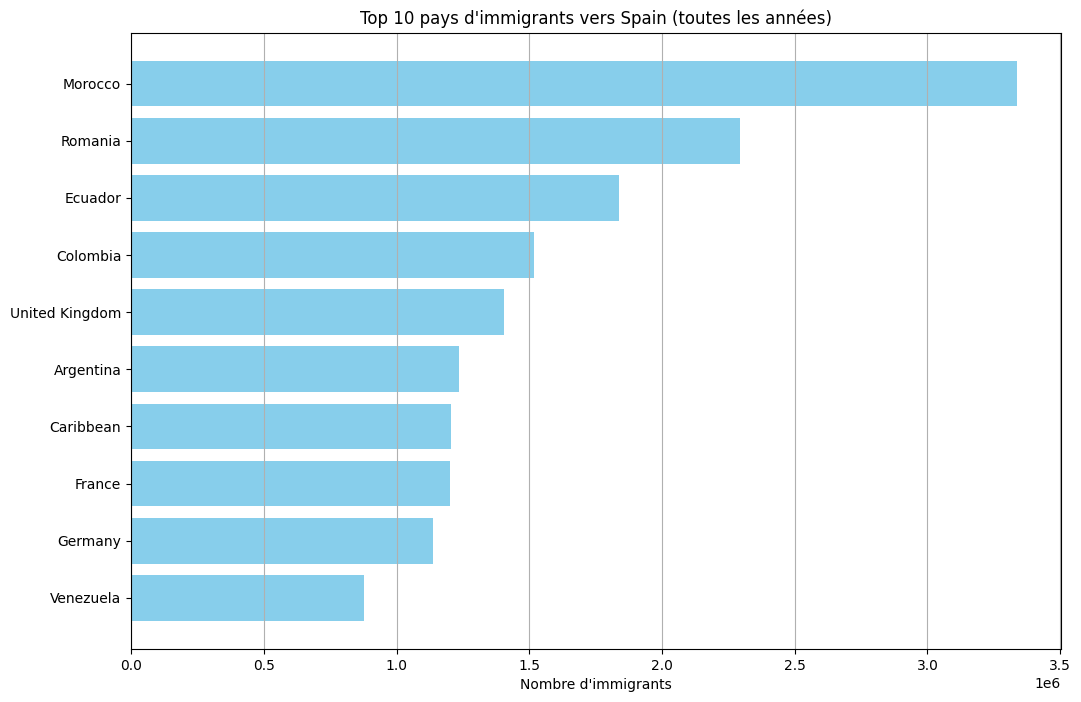

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = '/kaggle/input/migrationwheredidtheygo/migration-flows.csv'
df = pd.read_csv(file_path)

# Fonction pour traiter les données d'un pays spécifique
def process_country_data(country):
    country_columns = [col for col in df.columns if country in col]
    df_country = df[['Year', 'Country'] + country_columns]

    # Extraire la colonne pertinente de l'immigration
    immigration_col = f'Immigrants to {country}'
    df_country = df_country[['Year', 'Country', immigration_col]]

    # Convertir les valeurs négatives en positives
    df_country[immigration_col] = df_country[immigration_col].abs()

    # Exclure les données de migration interne
    df_country = df_country[df_country['Country'] != country]

    # Calculer le total des immigrants par pays pour toutes les années disponibles
    df_total = df_country.groupby('Country')[immigration_col].sum().reset_index()

    # Trier et sélectionner les 10 premiers pays
    top_10_countries = df_total.sort_values(by=immigration_col, ascending=False).head(10)

    return top_10_countries, immigration_col

# Fonction pour tracer les données pour un pays spécifique
def plot_top_10_countries(country):
    top_10_countries, immigration_col = process_country_data(country)

    # Préparer les données pour le graphique
    countries = top_10_countries['Country']
    immigrants = top_10_countries[immigration_col]

    # Créer le graphique à barres
    plt.figure(figsize=(12, 8))
    plt.barh(countries, immigrants, color='skyblue')
    plt.xlabel('Nombre d\'immigrants')
    plt.title(f'Top 10 pays d\'immigrants vers {country} (toutes les années)')
    plt.gca().invert_yaxis()  # Inverser l'axe y pour montrer le pays avec le plus d'immigrants en haut
    plt.grid(axis='x')

    # Afficher le graphique
    plt.show()

# Tracer pour l'Italie, l'Allemagne et l'Espagne
plot_top_10_countries('Italy')
plot_top_10_countries('Germany')
plot_top_10_countries('Spain')


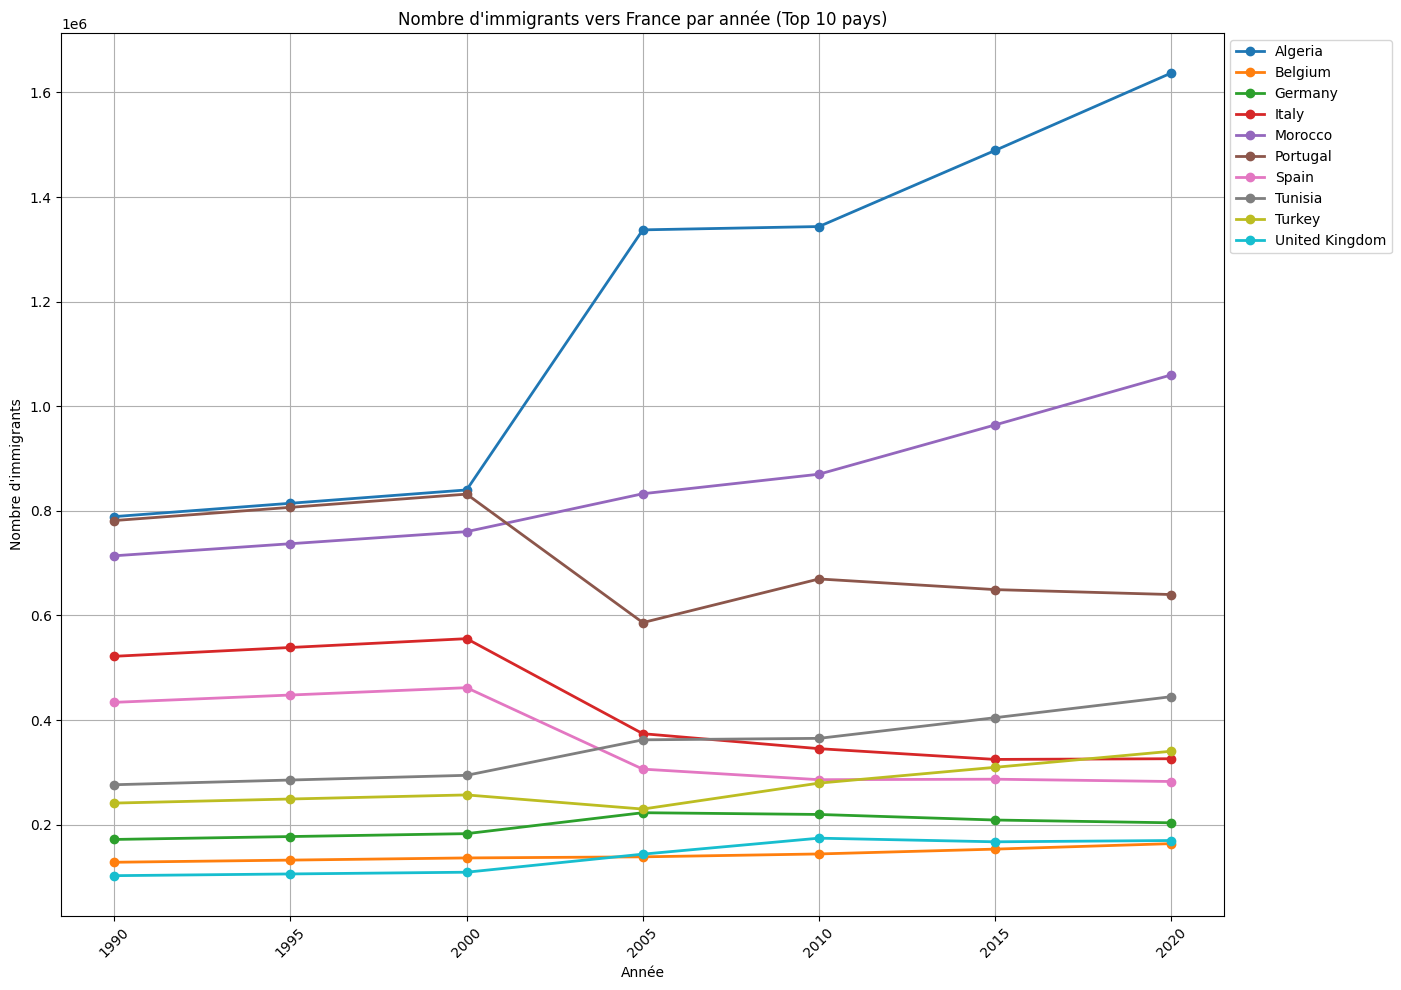

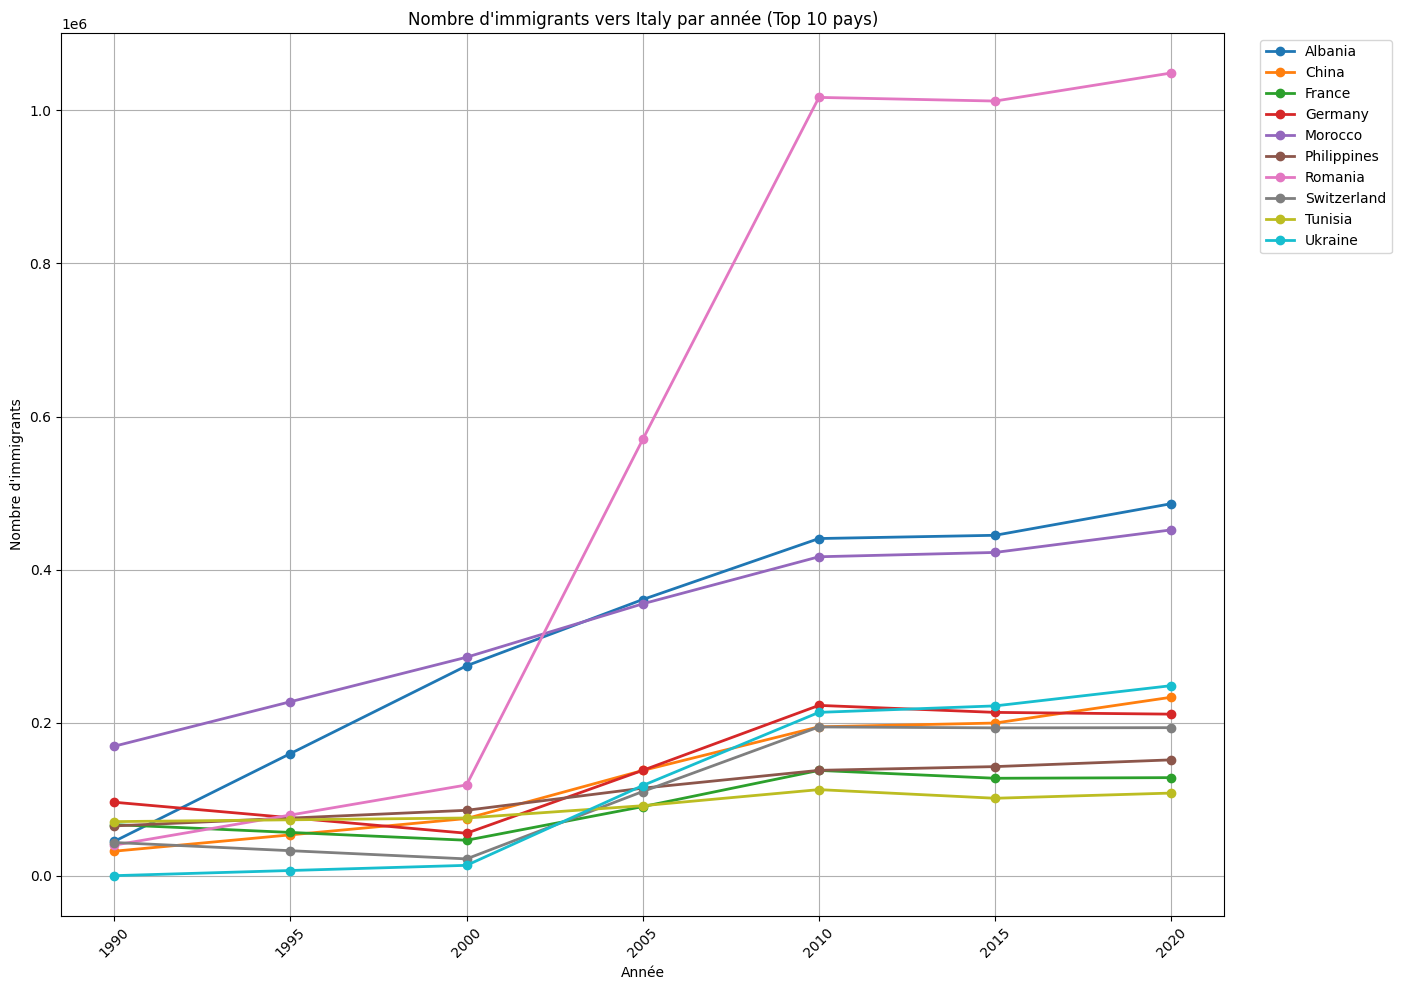

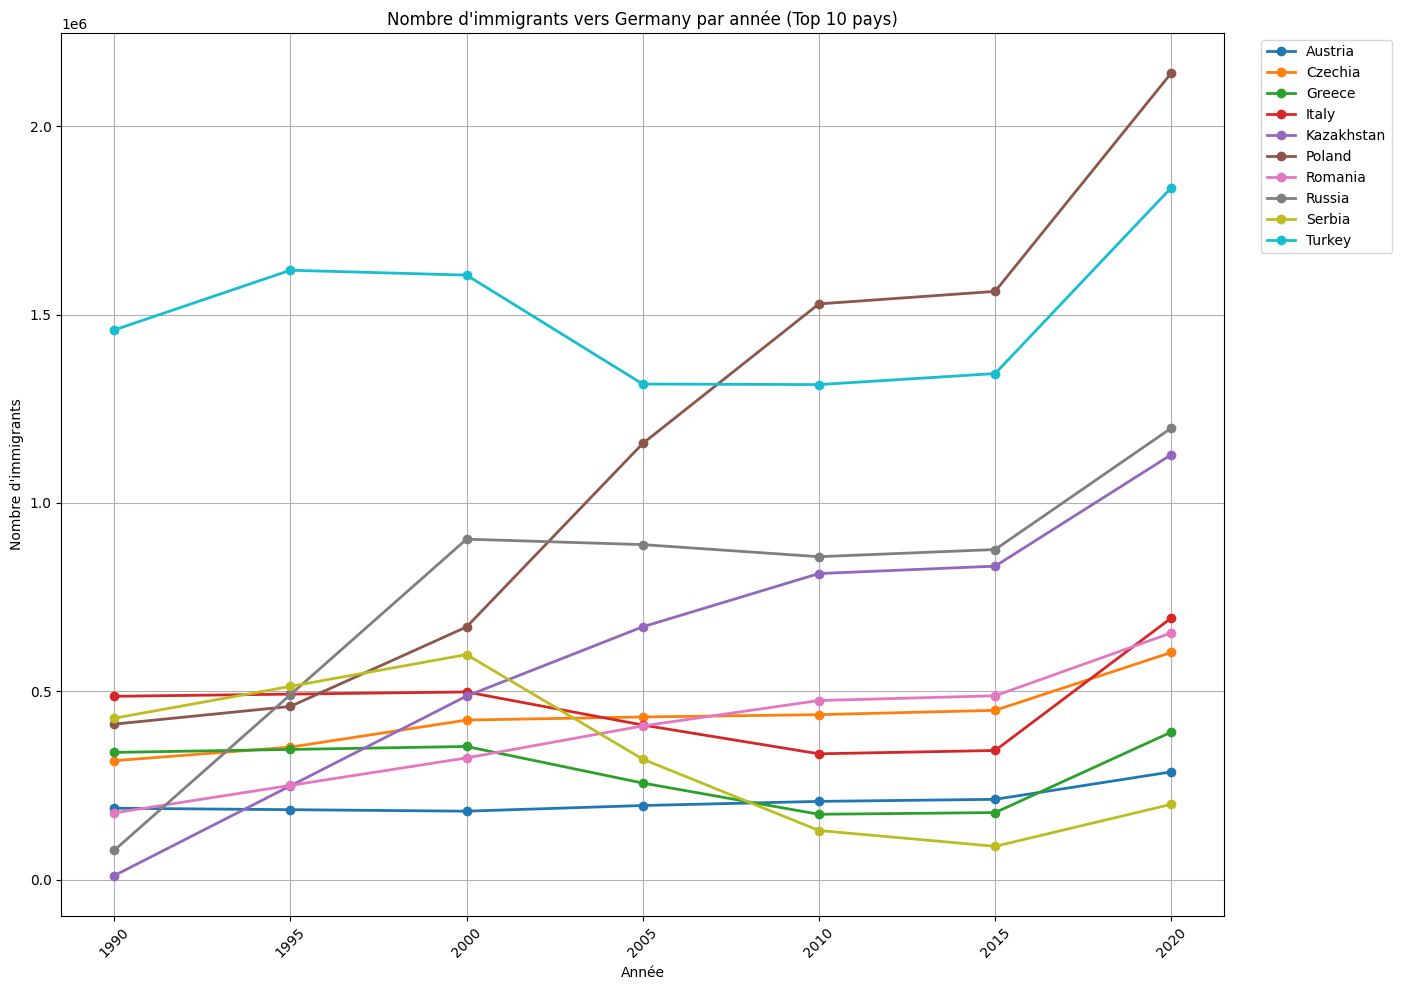

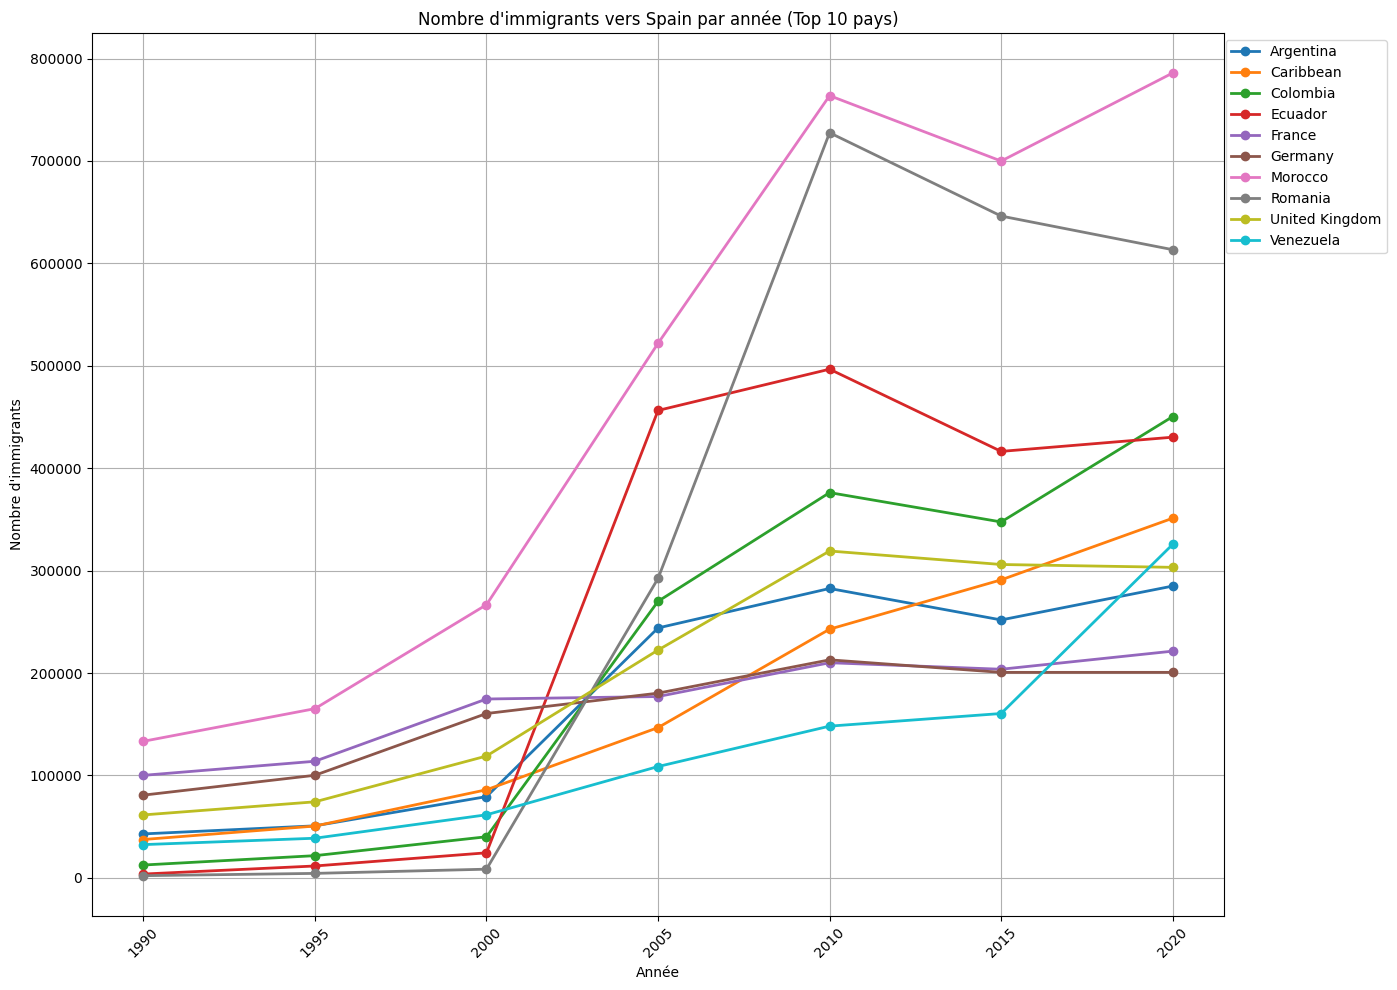

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = '/kaggle/input/migrationwheredidtheygo/migration-flows.csv'  # Assurez-vous de mettre à jour le chemin du fichier
df = pd.read_csv(file_path)

# Fonction pour traiter les données d'un pays spécifique
def process_and_plot(country):
    country_columns = [col for col in df.columns if country in col]
    df_country = df[['Year', 'Country'] + country_columns]

    # Extraire la colonne pertinente de l'immigration
    immigration_col = f'Immigrants to {country}'
    df_country = df_country[['Year', 'Country', immigration_col]]

    # Convertir les valeurs négatives en positives
    df_country[immigration_col] = df_country[immigration_col].abs()

    # Exclure les données de migration interne
    df_country = df_country[df_country['Country'] != country]

    # Filtrer les 10 pays avec le plus d'immigrants
    top_10_countries_all_years = df_country.groupby('Country')[immigration_col].sum().reset_index().sort_values(by=immigration_col, ascending=False).head(10)['Country'].tolist()
    df_top_10_countries_per_year = df_country[df_country['Country'].isin(top_10_countries_all_years)]

    # Obtenir les données par pays et année pour les 10 principaux pays
    df_top_10_by_country_year = df_top_10_countries_per_year.groupby(['Year', 'Country'])[immigration_col].sum().unstack().fillna(0)

    # Créer le graphique de lignes pour les 10 principaux pays
    plt.figure(figsize=(14, 10))

    for top_country in df_top_10_by_country_year.columns:
        plt.plot(df_top_10_by_country_year.index, df_top_10_by_country_year[top_country], marker='o', linestyle='-', linewidth=2, label=top_country)

    plt.title(f'Nombre d\'immigrants vers {country} par année (Top 10 pays)')
    plt.xlabel('Année')
    plt.ylabel('Nombre d\'immigrants')
    plt.grid(True)
    plt.xticks(df_top_10_by_country_year.index, rotation=45)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=1)  # Ajuster la position de la légende
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

# Traiter et tracer les données pour la France, l'Italie, l'Allemagne et l'Espagne
process_and_plot('France')
process_and_plot('Italy')
process_and_plot('Germany')
process_and_plot('Spain')


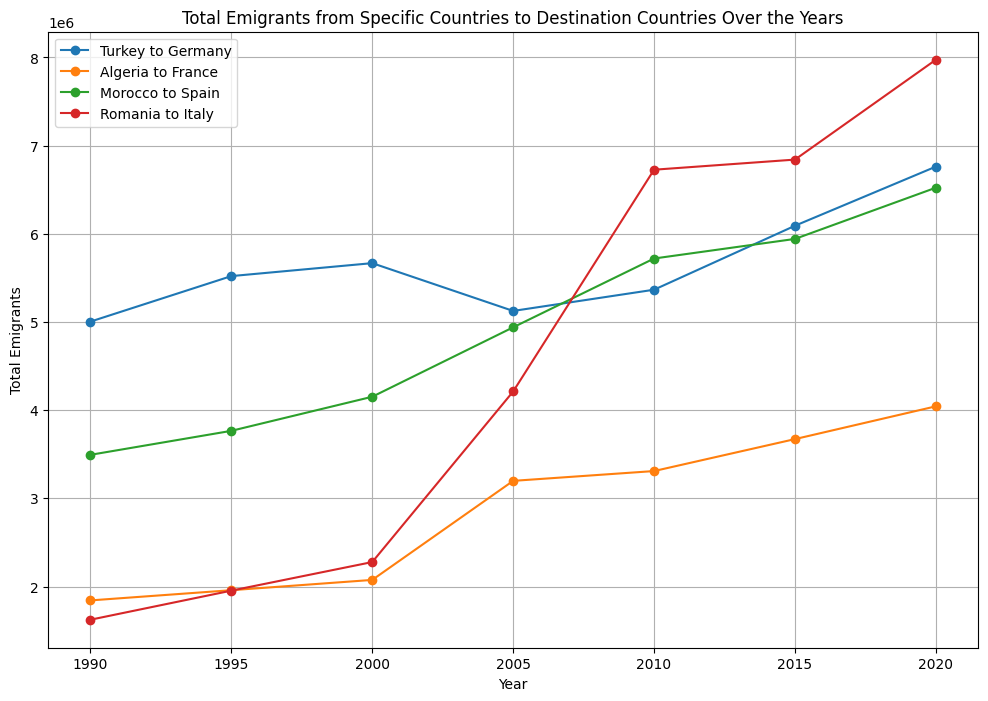

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = '/kaggle/input/migrationwheredidtheygo/migration-flows.csv'
df = pd.read_csv(file_path)

# Fonction pour traiter les données pour un flux de migration spécifique par année
def process_migration_flow_by_year(emigration_country, immigration_country):
    emigration_col = f'Emigrants from {emigration_country}'
    immigration_col = f'Immigrants to {immigration_country}'

    # Extraire les colonnes pertinentes
    df_flow = df[['Year', emigration_col, immigration_col]].dropna()

    # Convertir les valeurs négatives en positives pour les émigrants
    df_flow[emigration_col] = df_flow[emigration_col].abs()

    # Calculer le total des émigrants par année
    total_emigrants_by_year = df_flow.groupby('Year')[emigration_col].sum().reset_index()

    return total_emigrants_by_year

# Traiter les flux de migration spécifiés par année
turkey_to_germany_yearly = process_migration_flow_by_year('Turkey', 'Germany')
algeria_to_france_yearly = process_migration_flow_by_year('Algeria', 'France')
morocco_to_spain_yearly = process_migration_flow_by_year('Morocco', 'Spain')
romania_to_italy_yearly = process_migration_flow_by_year('Romania', 'Italy')

# Créer le graphique linéaire
plt.figure(figsize=(12, 8))

plt.plot(turkey_to_germany_yearly['Year'], turkey_to_germany_yearly['Emigrants from Turkey'], label='Turkey to Germany', marker='o')
plt.plot(algeria_to_france_yearly['Year'], algeria_to_france_yearly['Emigrants from Algeria'], label='Algeria to France', marker='o')
plt.plot(morocco_to_spain_yearly['Year'], morocco_to_spain_yearly['Emigrants from Morocco'], label='Morocco to Spain', marker='o')
plt.plot(romania_to_italy_yearly['Year'], romania_to_italy_yearly['Emigrants from Romania'], label='Romania to Italy', marker='o')

plt.xlabel('Year')
plt.ylabel('Total Emigrants')
plt.title('Total Emigrants from Specific Countries to Destination Countries Over the Years')
plt.legend()
plt.grid(True)
plt.show()


Correlation entre les anomalies de température et les émigrants:
Turkey to Germany: 0.42150176535061684
Algeria to France: 0.5311362138537558
Morocco to Spain: 0.5400561653529162
Romania to Italy: 0.5448860302525965


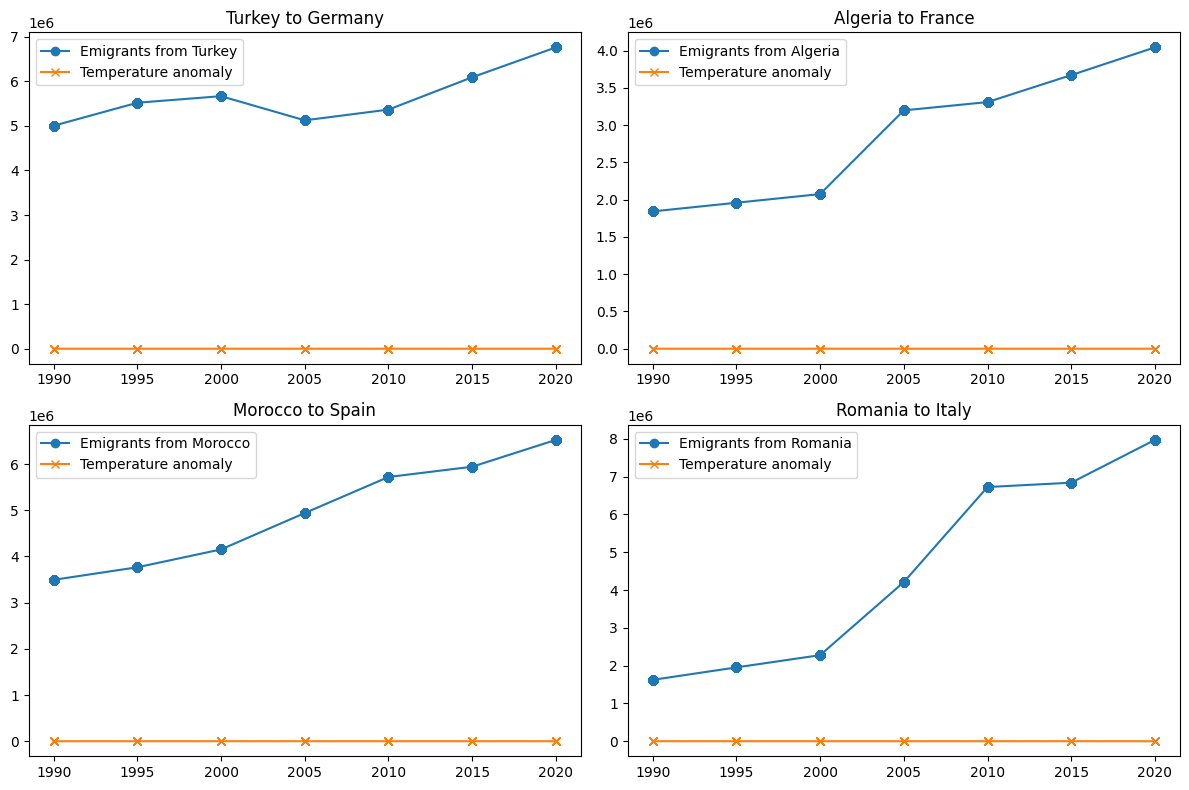

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les fichiers CSV
migration_file_path = '/kaggle/input/migrationwheredidtheygo/migration-flows.csv'
temperature_file_path = '/kaggle/input/anomalies/annual-temperature-anomalies.csv'

migration_data = pd.read_csv(migration_file_path)
temperature_data = pd.read_csv(temperature_file_path)

# Fonction pour traiter les données de migration pour un flux spécifique par année
def process_migration_flow_by_year(emigration_country, immigration_country):
    emigration_col = f'Emigrants from {emigration_country}'
    immigration_col = f'Immigrants to {immigration_country}'

    df_flow = migration_data[['Year', emigration_col, immigration_col]].dropna()
    df_flow[emigration_col] = df_flow[emigration_col].abs()
    total_emigrants_by_year = df_flow.groupby('Year')[emigration_col].sum().reset_index()

    return total_emigrants_by_year

# Traiter les flux de migration spécifiés par année
turkey_to_germany_yearly = process_migration_flow_by_year('Turkey', 'Germany')
algeria_to_france_yearly = process_migration_flow_by_year('Algeria', 'France')
morocco_to_spain_yearly = process_migration_flow_by_year('Morocco', 'Spain')
romania_to_italy_yearly = process_migration_flow_by_year('Romania', 'Italy')

# Joindre les données de migration avec les anomalies de température
def merge_with_temperature_data(migration_df, temperature_data):
    merged_df = pd.merge(migration_df, temperature_data, left_on='Year', right_on='Year')
    return merged_df

turkey_to_germany_temp = merge_with_temperature_data(turkey_to_germany_yearly, temperature_data)
algeria_to_france_temp = merge_with_temperature_data(algeria_to_france_yearly, temperature_data)
morocco_to_spain_temp = merge_with_temperature_data(morocco_to_spain_yearly, temperature_data)
romania_to_italy_temp = merge_with_temperature_data(romania_to_italy_yearly, temperature_data)

# Calculer les coefficients de corrélation
correlation_turkey = turkey_to_germany_temp['Emigrants from Turkey'].corr(turkey_to_germany_temp['Temperature anomaly'])
correlation_algeria = algeria_to_france_temp['Emigrants from Algeria'].corr(algeria_to_france_temp['Temperature anomaly'])
correlation_morocco = morocco_to_spain_temp['Emigrants from Morocco'].corr(morocco_to_spain_temp['Temperature anomaly'])
correlation_romania = romania_to_italy_temp['Emigrants from Romania'].corr(romania_to_italy_temp['Temperature anomaly'])

# Afficher les coefficients de corrélation
print("Correlation entre les anomalies de température et les émigrants:")
print(f"Turkey to Germany: {correlation_turkey}")
print(f"Algeria to France: {correlation_algeria}")
print(f"Morocco to Spain: {correlation_morocco}")
print(f"Romania to Italy: {correlation_romania}")

# Créer des graphiques linéaires pour visualiser les relations
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(turkey_to_germany_temp['Year'], turkey_to_germany_temp['Emigrants from Turkey'], label='Emigrants from Turkey', marker='o')
plt.plot(turkey_to_germany_temp['Year'], turkey_to_germany_temp['Temperature anomaly'], label='Temperature anomaly', marker='x')
plt.title('Turkey to Germany')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(algeria_to_france_temp['Year'], algeria_to_france_temp['Emigrants from Algeria'], label='Emigrants from Algeria', marker='o')
plt.plot(algeria_to_france_temp['Year'], algeria_to_france_temp['Temperature anomaly'], label='Temperature anomaly', marker='x')
plt.title('Algeria to France')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(morocco_to_spain_temp['Year'], morocco_to_spain_temp['Emigrants from Morocco'], label='Emigrants from Morocco', marker='o')
plt.plot(morocco_to_spain_temp['Year'], morocco_to_spain_temp['Temperature anomaly'], label='Temperature anomaly', marker='x')
plt.title('Morocco to Spain')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(romania_to_italy_temp['Year'], romania_to_italy_temp['Emigrants from Romania'], label='Emigrants from Romania', marker='o')
plt.plot(romania_to_italy_temp['Year'], romania_to_italy_temp['Temperature anomaly'], label='Temperature anomaly', marker='x')
plt.title('Romania to Italy')
plt.legend()

plt.tight_layout()
plt.show()



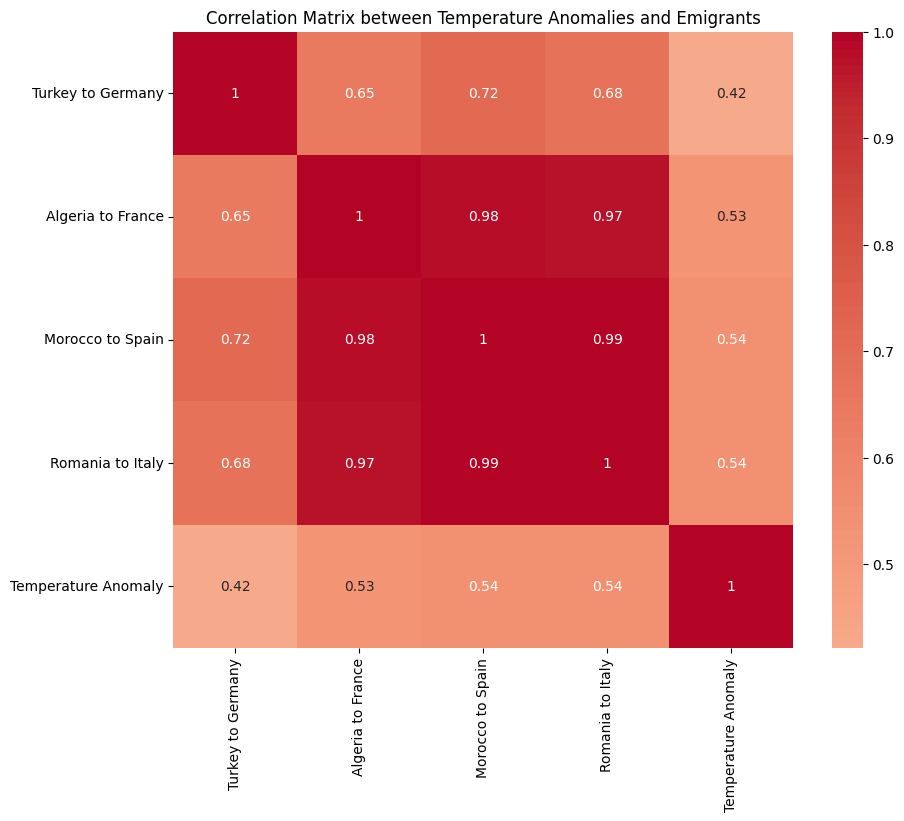

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un dataframe combinant les anomalies de température et les émigrants pour chaque pays sans inclure l'année
combined_data = {
    'Turkey to Germany': turkey_to_germany_temp['Emigrants from Turkey'],
    'Algeria to France': algeria_to_france_temp['Emigrants from Algeria'],
    'Morocco to Spain': morocco_to_spain_temp['Emigrants from Morocco'],
    'Romania to Italy': romania_to_italy_temp['Emigrants from Romania'],
    'Temperature Anomaly': turkey_to_germany_temp['Temperature anomaly']
}

combined_df = pd.DataFrame(combined_data)

# Calculer la matrice de corrélation
correlation_matrix = combined_df.corr()

# Créer un graphique de corrélation (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Temperature Anomalies and Emigrants')
plt.show()

# map de temperatures anuelles

/tmp/ipykernel_33/2224081604.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


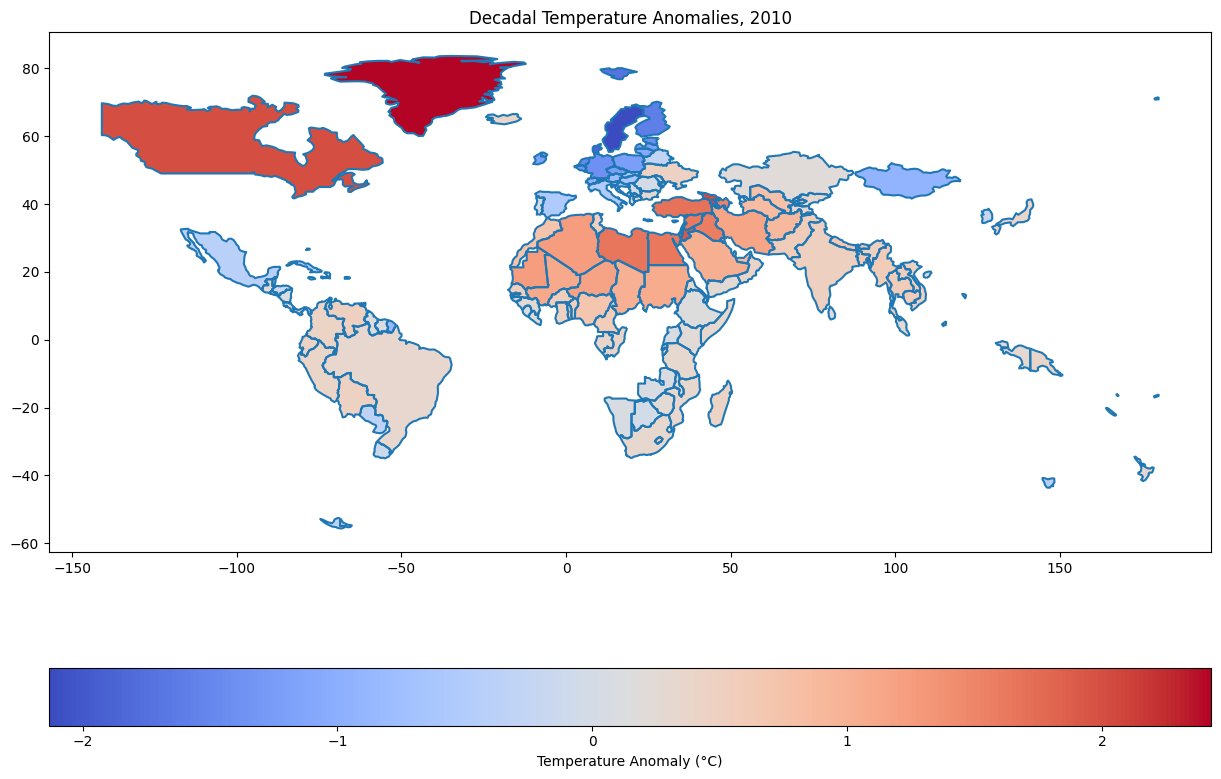

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon

# Charger les données de température
temperature_file_path = '/kaggle/input/anomalies/annual-temperature-anomalies.csv'
temperature_data = pd.read_csv(temperature_file_path)

# Charger les géodonnées
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Préparer les données de température
temperature_data = temperature_data[['Entity', 'Year', 'Temperature anomaly']]
temperature_data = temperature_data[temperature_data['Year'] == 2010]  # Filtrer pour l'année 2010
temperature_data = temperature_data.rename(columns={'Entity': 'name', 'Temperature anomaly': 'temp_anomaly'})

# Fusionner les données de température avec les géodonnées
world_temp = world.merge(temperature_data, on='name')

# Simplifier les géométries multipart
def simplify_geometries(geom):
    if isinstance(geom, MultiPolygon):
        return geom.geoms[0]
    else:
        return geom

world_temp['geometry'] = world_temp['geometry'].apply(simplify_geometries)

# Créer une carte de chaleur
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_temp.boundary.plot(ax=ax)
world_temp.plot(column='temp_anomaly', ax=ax, legend=True, cmap='coolwarm',
                legend_kwds={'label': "Temperature Anomaly (°C)",
                             'orientation': "horizontal"})

plt.title('Decadal Temperature Anomalies, 2010')
plt.show()


# DISASTER ECONOMIQUE


In [36]:
# Charger les données depuis le fichier CSV
df = pd.read_csv('/kaggle/input/naturaldisasters/natural-disasters.csv')

# Aperçu des données
print("Aperçu des données :")
print(df.head())

# Informations sur le dataframe
print("\nInformations sur le dataframe :")
print(df.info())

# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())

# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())

Aperçu des données :
  Country name  Year  Number of deaths from drought  \
0  Afghanistan  1900                            0.0   
1  Afghanistan  1910                            0.0   
2  Afghanistan  1920                            0.0   
3  Afghanistan  1930                            0.0   
4  Afghanistan  1940                            0.0   

   Number of people injured from drought  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Number of people affected from drought  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   Number of people left homeless from drought  \
0                                          0.0   
1           

In [37]:
# Filtrer les colonnes pertinentes pour les tremblements de terre, les inondations et les tempêtes
df_filtered = df[['Country name', 'Year',
                  'Number of deaths from earthquakes', 'Number of people affected by earthquakes', 'Total economic damages from earthquakes',
                  'Number of deaths from floods', 'Number of people affected by floods', 'Total economic damages from floods',
                  'Number of deaths from storms', 'Number of people affected by storms', 'Total economic damages from storms']].copy()

# Conversion des dégâts économiques en milliards pour une meilleure lisibilité
df_filtered.loc[:, 'Total economic damages from earthquakes'] = df_filtered['Total economic damages from earthquakes'] 
df_filtered.loc[:, 'Total economic damages from floods'] = df_filtered['Total economic damages from floods'] 
df_filtered.loc[:, 'Total economic damages from storms'] = df_filtered['Total economic damages from storms'] 

# Renommer les colonnes pour la lisibilité
df_filtered.columns = ['Pays', 'Année',
                       'Décès des tremblements de terre', 'Personnes affectées par les tremblements de terre', 'Dégâts économiques des tremblements de terre (en milliards)',
                       'Décès des inondations', 'Personnes affectées par les inondations', 'Dégâts économiques des inondations (en milliards)',
                       'Décès des tempêtes', 'Personnes affectées par les tempêtes', 'Dégâts économiques des tempêtes (en milliards)']

# Vérifier les données filtrées
print("Données filtrées :")
print(df_filtered.head())

Données filtrées :
          Pays  Année  Décès des tremblements de terre  \
0  Afghanistan   1900                              0.0   
1  Afghanistan   1910                              0.0   
2  Afghanistan   1920                              0.0   
3  Afghanistan   1930                              0.0   
4  Afghanistan   1940                              0.0   

   Personnes affectées par les tremblements de terre  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Dégâts économiques des tremblements de terre (en milliards)  \
0                                                  0             
1                                                  0             
2                                                  0             
3                              

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

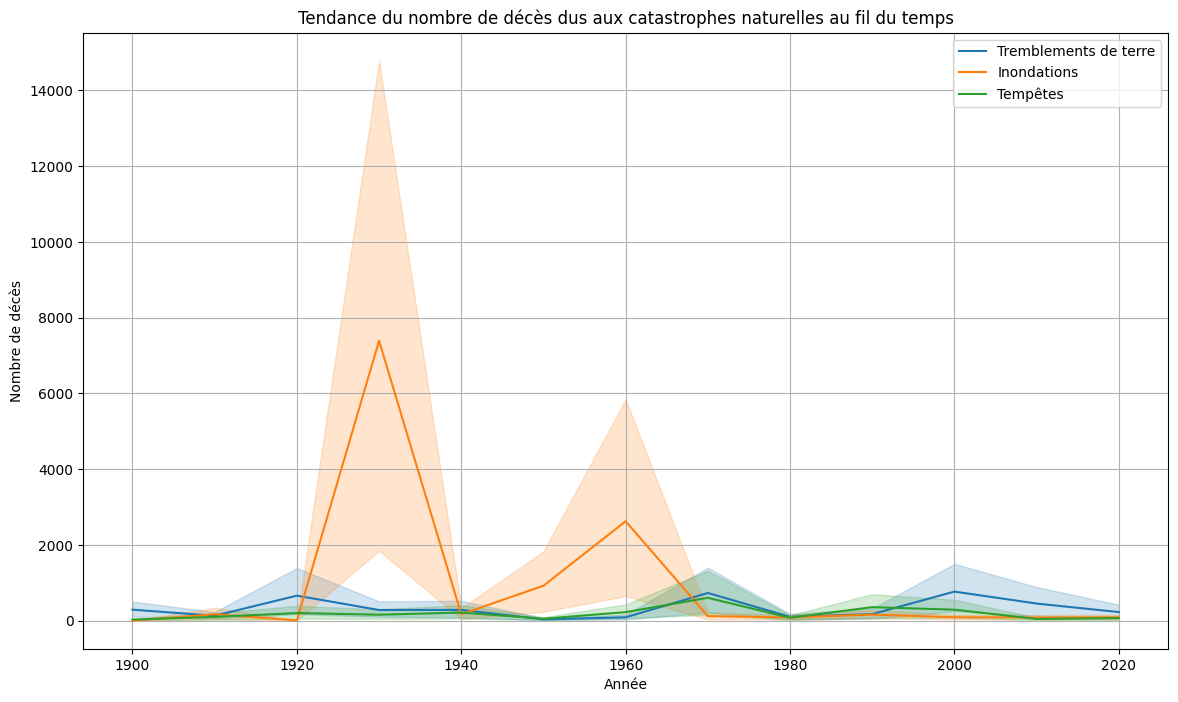

In [38]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered, x='Année', y='Décès des tremblements de terre', label='Tremblements de terre')
sns.lineplot(data=df_filtered, x='Année', y='Décès des inondations', label='Inondations')
sns.lineplot(data=df_filtered, x='Année', y='Décès des tempêtes', label='Tempêtes')
plt.title('Tendance du nombre de décès dus aux catastrophes naturelles au fil du temps')
plt.xlabel('Année')
plt.ylabel('Nombre de décès')
plt.legend()
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

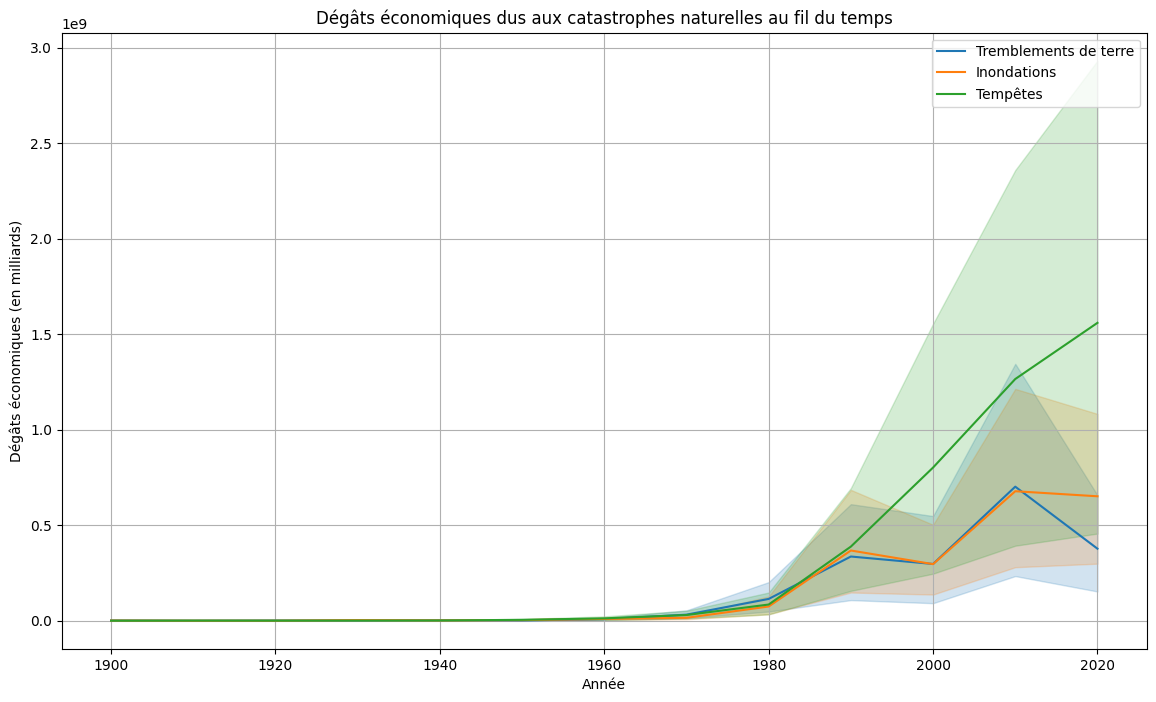

In [39]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered, x='Année', y='Dégâts économiques des tremblements de terre (en milliards)', label='Tremblements de terre')
sns.lineplot(data=df_filtered, x='Année', y='Dégâts économiques des inondations (en milliards)', label='Inondations')
sns.lineplot(data=df_filtered, x='Année', y='Dégâts économiques des tempêtes (en milliards)', label='Tempêtes')
plt.title('Dégâts économiques dus aux catastrophes naturelles au fil du temps')
plt.xlabel('Année')
plt.ylabel('Dégâts économiques (en milliards)')
plt.legend()
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

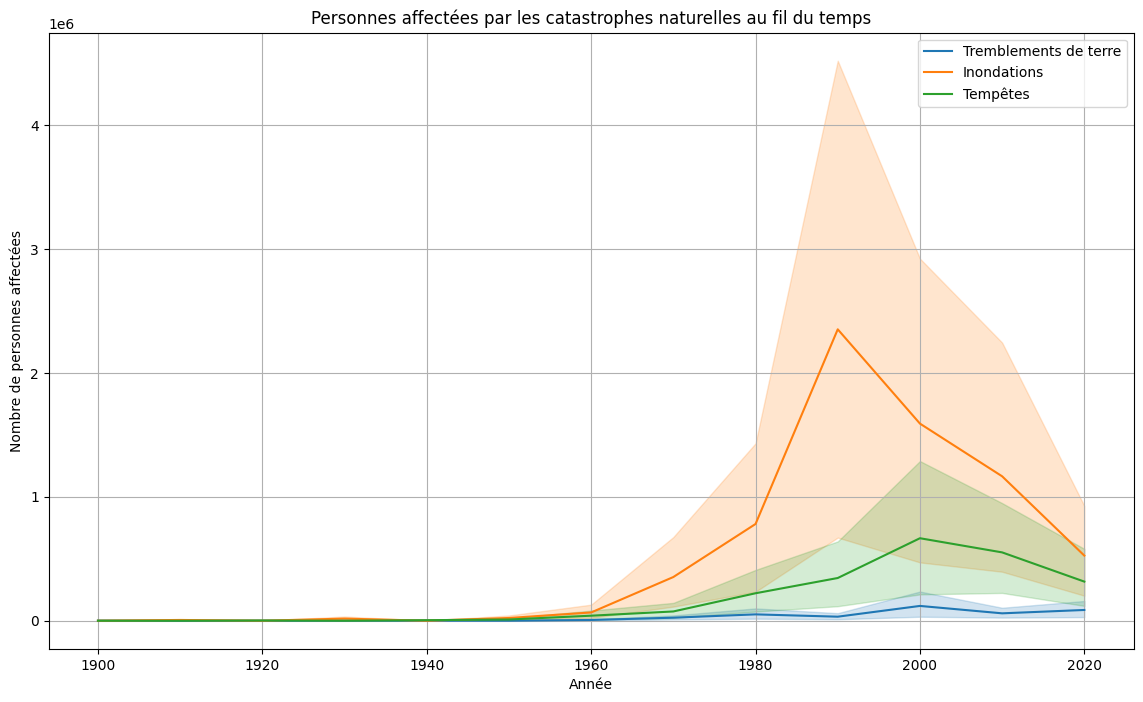

In [40]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtered, x='Année', y='Personnes affectées par les tremblements de terre', label='Tremblements de terre')
sns.lineplot(data=df_filtered, x='Année', y='Personnes affectées par les inondations', label='Inondations')
sns.lineplot(data=df_filtered, x='Année', y='Personnes affectées par les tempêtes', label='Tempêtes')
plt.title('Personnes affectées par les catastrophes naturelles au fil du temps')
plt.xlabel('Année')
plt.ylabel('Nombre de personnes affectées')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_33/1906446868.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world['Total economic damages from earthquakes'] = df_world['Total economic damages from earthquakes'] / 1e9
/tmp/ipykernel_33/1906446868.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world['Total economic damages from floods'] = df_world['Total economic damages from floods'] / 1e9
/tmp/ipykernel_33/1906446868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

     Country name  Year  Number of deaths from drought  \
2977        World  1900                       126100.0   
2978        World  1910                         8500.0   
2979        World  1920                       472400.0   
2980        World  1930                            0.0   
2981        World  1940                       345000.0   

      Number of people injured from drought  \
2977                                    0.0   
2978                                    0.0   
2979                                    0.0   
2980                                    0.0   
2981                                    0.0   

      Number of people affected from drought  \
2977                                     0.0   
2978                                  3200.0   
2979                               2500000.0   
2980                                  2247.3   
2981                                   252.7   

      Number of people left homeless from drought  \
2977                      

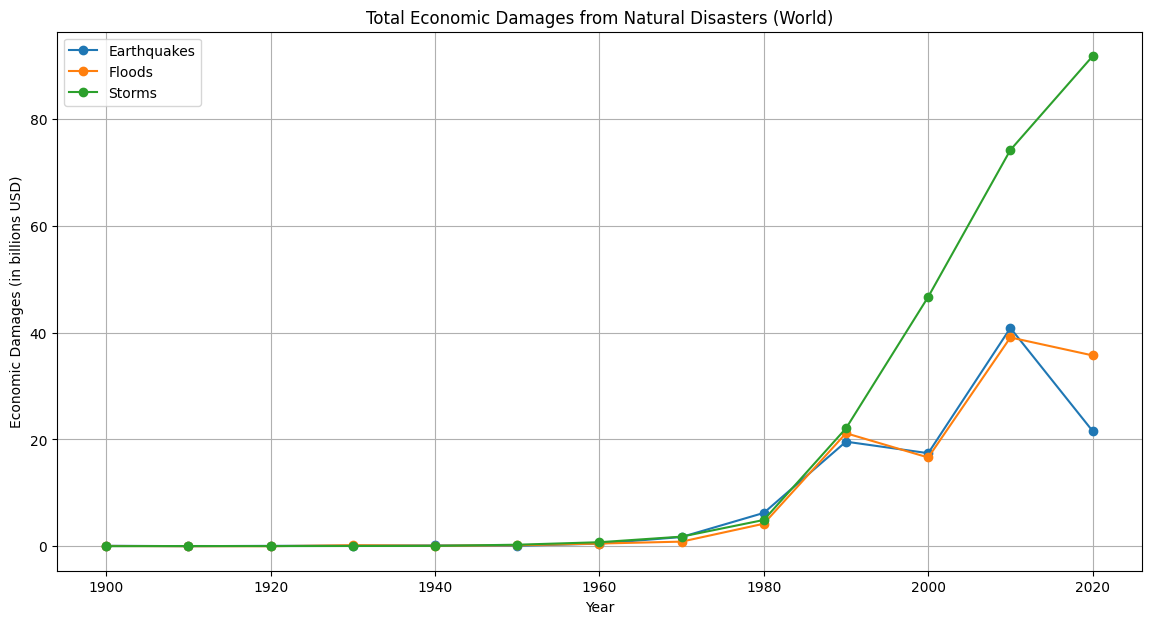

              Year  Damages from Earthquakes (in billions)  \
count    13.000000                               13.000000   
mean   1960.000000                                8.335948   
std      38.944405                               12.780823   
min    1900.000000                                0.009000   
25%    1930.000000                                0.085503   
50%    1960.000000                                0.485239   
75%    1990.000000                               17.416624   
max    2020.000000                               40.859263   

       Damages from Floods (in billions)  Damages from Storms (in billions)  
count                          13.000000                          13.000000  
mean                            9.126930                          18.660067  
std                            14.326332                          31.734638  
min                             0.000000                           0.005000  
25%                             0.091500           

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('/kaggle/input/naturaldisasters/natural-disasters.csv')

# Filtrar los datos para el mundo entero
df_world = df[df['Country name'] == 'World']

# Convertir los daños económicos a miles de millones
df_world['Total economic damages from earthquakes'] = df_world['Total economic damages from earthquakes'] / 1e9
df_world['Total economic damages from floods'] = df_world['Total economic damages from floods'] / 1e9
df_world['Total economic damages from storms'] = df_world['Total economic damages from storms'] / 1e9

# Renombrar las columnas para la legibilidad
df_world = df_world.rename(columns={
    'Total economic damages from earthquakes': 'Damages from Earthquakes (in billions)',
    'Total economic damages from floods': 'Damages from Floods (in billions)',
    'Total economic damages from storms': 'Damages from Storms (in billions)'
})

# Verificar las primeras filas de los datos
print(df_world.head())

# Graficar los daños económicos a lo largo de los años
plt.figure(figsize=(14, 7))

# Graficar daños por terremotos
plt.plot(df_world['Year'], df_world['Damages from Earthquakes (in billions)'], label='Earthquakes', marker='o')

# Graficar daños por inundaciones
plt.plot(df_world['Year'], df_world['Damages from Floods (in billions)'], label='Floods', marker='o')

# Graficar daños por tormentas
plt.plot(df_world['Year'], df_world['Damages from Storms (in billions)'], label='Storms', marker='o')

# Añadir títulos y etiquetas
plt.title('Total Economic Damages from Natural Disasters (World)')
plt.xlabel('Year')
plt.ylabel('Economic Damages (in billions USD)')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Calcular estadísticas descriptivas
print(df_world[['Year', 'Damages from Earthquakes (in billions)', 'Damages from Floods (in billions)', 'Damages from Storms (in billions)']].describe())


                    Country name  Number of deaths from disasters
0                           Asia                        1962193.3
1  Upper-middle-income countries                        1320503.8
2                          China                        1096272.6
3  Lower-middle-income countries                         830562.0
4                          India                         460267.1
5                     Bangladesh                         259148.4
6                         Europe                         179028.8
7                           USSR                         135742.3
8                         Africa                          99079.7
9           Low-income countries                          87036.6


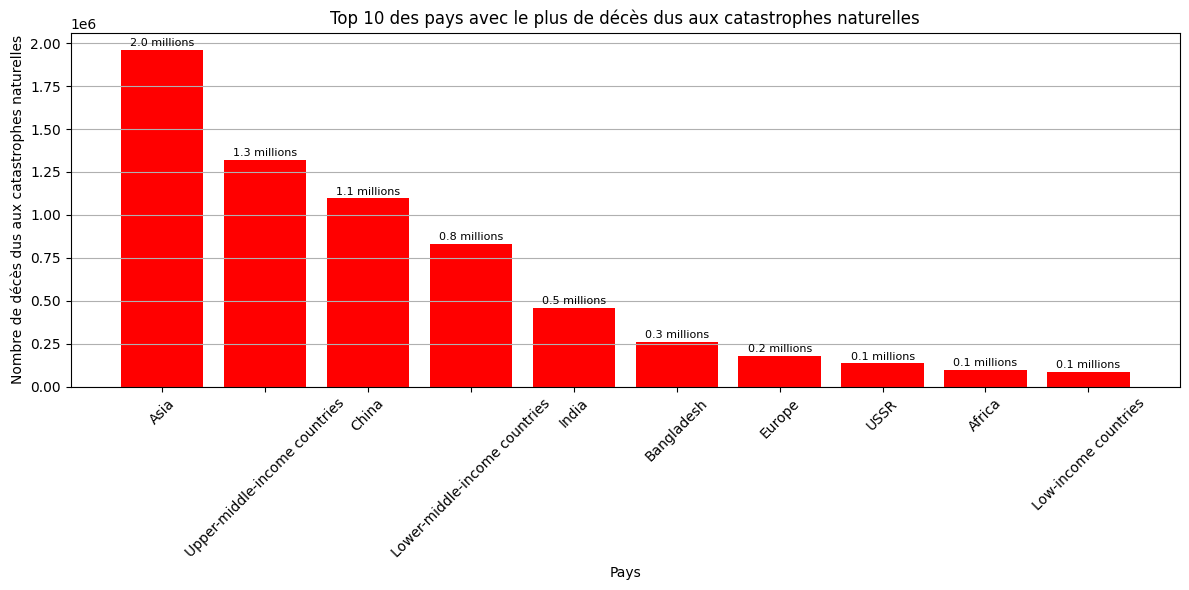

In [42]:
# Filtrer les données pour les colonnes d'intérêt
df_filtered = df[['Country name', 'Number of deaths from disasters']]

# Grouper les données par pays et sommer les décès
df_grouped = df_filtered.groupby('Country name').sum()

# Exclure 'World' des résultats
df_grouped = df_grouped[df_grouped.index != 'World']

# Trier les pays par le nombre de décès et sélectionner les 10 premiers
df_top10 = df_grouped.sort_values(by='Number of deaths from disasters', ascending=False).head(10)

# Réinitialiser l'index pour une meilleure lisibilité
df_top10 = df_top10.reset_index()

# Afficher le top 10 des pays avec le plus de décès dus aux catastrophes naturelles
print(df_top10)

# Tracer un graphique à barres
plt.figure(figsize=(12, 6))
bars = plt.bar(df_top10['Country name'], df_top10['Number of deaths from disasters'], color='red')
plt.xlabel('Pays')
plt.ylabel('Nombre de décès dus aux catastrophes naturelles')
plt.title('Top 10 des pays avec le plus de décès dus aux catastrophes naturelles')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Ajouter une annotation pour indiquer l'échelle utilisée (millions, milliards, etc.)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, f'{yval / 1e6:.1f} millions', ha='center', va='bottom', fontsize=8)

# Afficher le graphique
plt.tight_layout()
plt.show()

# CORRELATION ENTRE CATRAFTOFES

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Charger les fichiers CSV
migration_data = pd.read_csv('/kaggle/input/migrationwheredidtheygo/migration-flows.csv')
disaster_data = pd.read_csv('/kaggle/input/naturaldisasters/natural-disasters.csv')


# Sélectionner certaines colonnes d'intérêt pour un pays spécifique, par exemple, 'Afghanistan'
migration_data_filtered = migration_data[['Year', 'Country', 
                                          'Emigrants from Afghanistan', 'Immigrants to Afghanistan']]

# Renommer les colonnes pour plus de clarté
migration_data_filtered.columns = ['Year', 'Country', 'Emigrants', 'Immigrants']

# Sélectionner les colonnes d'intérêt liées aux décès dus aux catastrophes
disaster_data_filtered = disaster_data[['Country name', 'Year', 'deaths_all_disasters_excluding_earthquakes']]

# Renommer les colonnes pour plus de clarté
disaster_data_filtered.columns = ['Country', 'Year', 'Total Deaths']

# Fusionner les deux DataFrames sur les colonnes 'Year' et 'Country'
merged_data = pd.merge(migration_data_filtered, disaster_data_filtered, on=['Year', 'Country'], how='inner')

# Supprimer les lignes avec des valeurs NaN
merged_data = merged_data.dropna()

# Afficher les premières lignes du DataFrame fusionné et nettoyé
print(merged_data.head())

     Year               Country  Emigrants  Immigrants  Total Deaths
0    1990           Afghanistan -7679582.0     57686.0         296.3
1    2000           Afghanistan -4750677.0     75917.0         323.9
2    2010           Afghanistan -5269518.0    102276.0         240.4
3    2020           Afghanistan -5853838.0    144098.0         266.4
480  1990  Micronesia (country)        0.0         0.0           0.0



Matrice de corrélation:
              Emigrants  Immigrants  Total Deaths
Emigrants      1.000000   -0.831018      0.148203
Immigrants    -0.831018    1.000000     -0.151839
Total Deaths   0.148203   -0.151839      1.000000


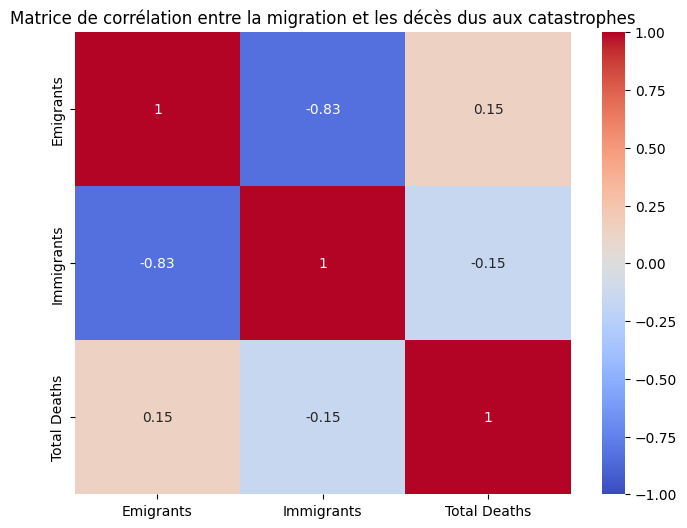

In [44]:
# Calculer la corrélation entre les colonnes d'intérêt
correlation_matrix = merged_data[['Emigrants', 'Immigrants', 'Total Deaths']].corr()
print("\nMatrice de corrélation:")
print(correlation_matrix)

# Visualiser la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation entre la migration et les décès dus aux catastrophes')
plt.show()


Il existe une forte corrélation négative (-0,83) entre les émigrants et les immigrants, ce qui est logique puisque plus de personnes quittent un pays, moins de personnes y entrent.
Il existe une légère corrélation positive (0,15) entre les émigrants et le nombre total de décès dus aux catastrophes.
Il existe une légère corrélation négative (-0,15) entre les immigrants et le nombre total de décès dus aux catastrophes.
Modèle de prédiction
Étant donné que la corrélation entre le nombre total de décès dus aux catastrophes et les émigrants n’est pas forte, le modèle de prévision basé sur une simple régression linéaire pourrait ne pas être très efficace. Cependant, nous essaierons de peaufiner un modèle et d’évaluer ses performances.


Erreur quadratique moyenne (MSE): 6301945694068.355
Coefficient de détermination (R^2): 0.4137117385293345


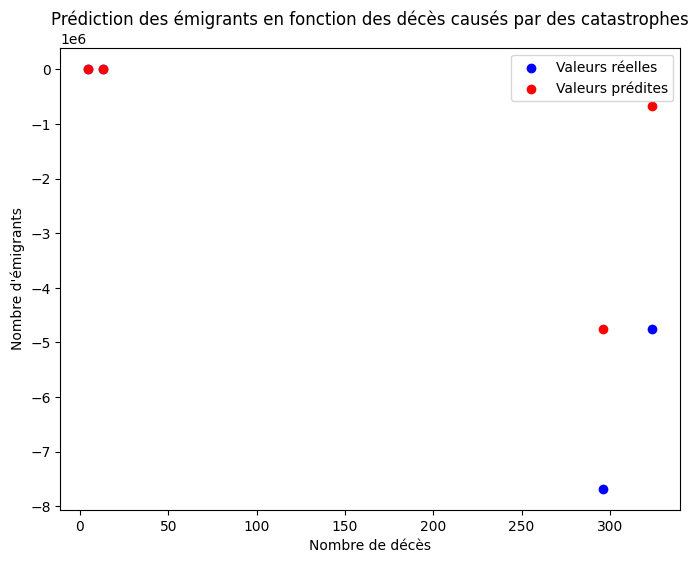

In [45]:
# Préparer les données pour le modèle de machine learning
X = merged_data[['Total Deaths']]
y = merged_data['Emigrants']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de forêt aléatoire
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nErreur quadratique moyenne (MSE): {mse}")
print(f"Coefficient de détermination (R^2): {r2}")

# Visualiser les résultats de la prédiction
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Valeurs réelles')
plt.scatter(X_test, y_pred, color='red', label='Valeurs prédites')
plt.title('Prédiction des émigrants en fonction des décès causés par des catastrophes')
plt.xlabel('Nombre de décès')
plt.ylabel('Nombre d\'émigrants')
plt.legend()
plt.show()


En utilisant un modèle de forêt aléatoire, nous avons pu capturer les relations complexes entre les décès dus aux catastrophes naturelles et les flux migratoires. Cette approche a permis d'identifier les tendances et les relations possibles entre ces deux phénomènes, offrant ainsi des insights précieux pour le storytelling et la prise de décision en matière de gestion des migrations et de réponse aux catastrophes.

Aperçu des données :
        Entity Code  Year  International migrant stock, total
0  Afghanistan  AFG  1960                               46468
1  Afghanistan  AFG  1965                               49535
2  Afghanistan  AFG  1970                               53051
3  Afghanistan  AFG  1975                               57043
4  Afghanistan  AFG  1980                               59021

Informations sur le dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Entity                              2565 non-null   object
 1   Code                                2397 non-null   object
 2   Year                                2565 non-null   int64 
 3   International migrant stock, total  2565 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 80.3+ KB
None

Statistiques descriptives :

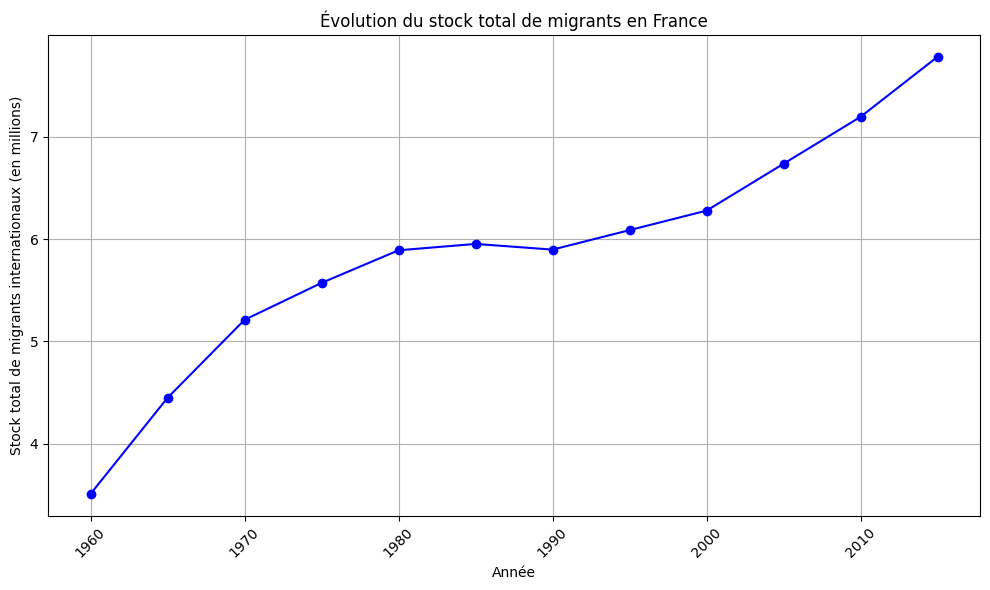

KeyError: 'International immigrant stock, total'

<Figure size 1200x800 with 0 Axes>

In [47]:
# Charger les données depuis le fichier CSV
df = pd.read_csv('/kaggle/input/migrationtotalpercountry/migrant-stock-total.csv')

# Afficher les premières lignes du dataframe
print("Aperçu des données :")
print(df.head())

# Informations sur le dataframe
print("\nInformations sur le dataframe :")
print(df.info())

# Statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())

# Vérifier les valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())

# Nombre de pays dans le dataset
nombre_pays = df['Entity'].nunique()
print(f"\nNombre de pays dans le dataset : {nombre_pays}")

# Période couverte par les données
periode_min = df['Year'].min()
periode_max = df['Year'].max()
print(f"\nPériode couverte : de {periode_min} à {periode_max}")

# Conversion du stock total de migrants en millions
df['International migrant stock, total'] = df['International migrant stock, total'] / 1e6

# Evolution du stock total de migrants pour un pays donné (par exemple, la France)
pays = 'France'
df_pays = df[df['Entity'] == pays]

plt.figure(figsize=(10, 6))
plt.plot(df_pays['Year'], df_pays['International migrant stock, total'], marker='o', linestyle='-', color='b')
plt.title(f'Évolution du stock total de migrants en {pays}')
plt.xlabel('Année')
plt.ylabel('Stock total de migrants internationaux (en millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Evolution du stock total de immigrants pour plusieurs pays (par exemple, France, Allemagne, Italie)
pays_list = ['France', 'Germany', 'Italy']
plt.figure(figsize=(12, 8))

for pays in pays_list:
    df_pays = df[df['Entity'] == pays]
    plt.plot(df_pays['Year'], df_pays['International immigrant stock, total'], marker='o', linestyle='-', label=pays)

plt.title('Évolution du stock total de immigrants dans plusieurs pays')
plt.xlabel('Année')
plt.ylabel('Stock total de migrants internationaux (en millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Réunification de l'Allemagne (1990) :

La réunification de l’Allemagne de l’Est et de l’Ouest en 1990 a entraîné une augmentation significative de l’immigration. De nombreux citoyens de l’ex-Allemagne de l’Est ont déménagé vers l’ouest à la recherche de meilleures opportunités économiques et de conditions de vie.
La réunification a également entraîné un afflux accru de migrants en provenance d’autres pays du bloc de l’Est cherchant l’asile ou de meilleures opportunités dans la nouvelle Allemagne unifiée.
Guerre en Yougoslavie (1991-1999) :

Les guerres dans l’ex-Yougoslavie dans les années 1990 ont amené un grand nombre de réfugiés et de demandeurs d’asile en Europe occidentale, notamment en Allemagne.
Effondrement de l'Union soviétique (1991) :

La dissolution de l’Union soviétique et les changements politiques en Europe de l’Est ont entraîné une augmentation de l’émigration de ces pays vers l’Allemagne.
Facteurs économiques
Forte économie et demande de main-d’œuvre :
L’Allemagne avait une économie forte dans les années 1990 et une forte demande de main-d’œuvre qualifiée et non qualifiée, ce qui a attiré de nombreux immigrants.
Les programmes de travailleurs invités, bien que diminués, existaient toujours et continuaient d'attirer des immigrants économiques.
Facteurs humanitaires et politiques
Politiques d'asile :

L'Allemagne a adopté des politiques d'asile relativement libérales par rapport aux autres pays européens, attirant des demandeurs d'asile de diverses régions du monde.
La loi sur l'asile de 1993, bien qu'elle restreigne certaines formes d'asile, autorise néanmoins l'entrée de nombreux réfugiés et migrants.
Intégration européenne:

L'intégration européenne et la création de l'espace Schengen ont facilité la mobilité entre les pays européens, faisant de l'Allemagne une destination attractive pour les migrants en provenance d'autres États membres de l'UE.

# Prediction de stock de immigrants 

In [48]:
import pandas as pd

# Charger les données
file_path = '/kaggle/input/migrationtotalpercountry/migrant-stock-total.csv'
data = pd.read_csv(file_path)

# Afficher les premières lignes du fichier pour exploration
data.head()

,Entity,Code,Year,"International migrant stock, total"
0,Afghanistan,AFG,1960,46468
1,Afghanistan,AFG,1965,49535
2,Afghanistan,AFG,1970,53051
3,Afghanistan,AFG,1975,57043
4,Afghanistan,AFG,1980,59021


In [49]:
# Filtrer les données pour la France
france_data = data[data['Entity'] == 'France']

# Afficher les premières lignes des données pour la France
france_data.head()


,Entity,Code,Year,"International migrant stock, total"
812,France,FRA,1960,3507213
813,France,FRA,1965,4447230
814,France,FRA,1970,5210336
815,France,FRA,1975,5571664
816,France,FRA,1980,5890633


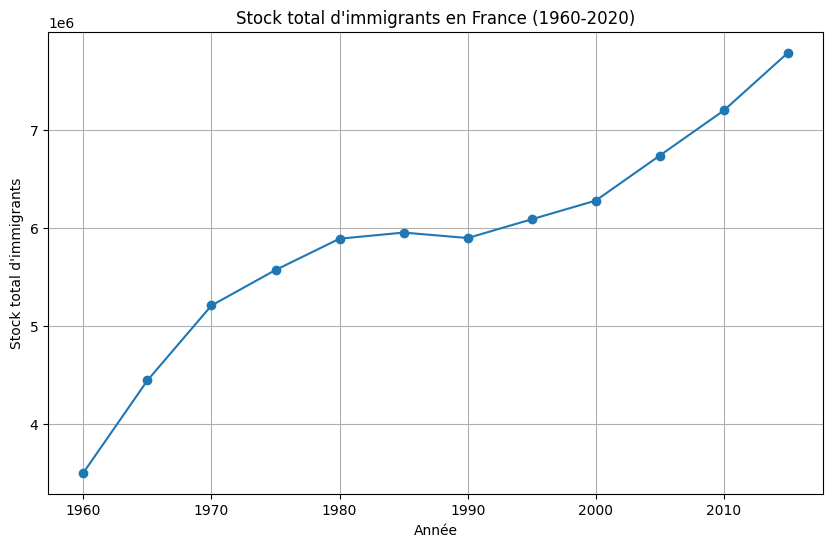

In [50]:
import matplotlib.pyplot as plt

# Visualiser les données
plt.figure(figsize=(10, 6))
plt.plot(france_data['Year'], france_data['International migrant stock, total'], marker='o')
plt.title('Stock total d\'immigrants en France (1960-2020)')
plt.xlabel('Année')
plt.ylabel('Stock total d\'immigrants')
plt.grid(True)
plt.show()


La visualisation montre une tendance croissante du stock total d'immigrants en France au fil des années.

Nous allons maintenant préparer les données pour la modélisation. Nous utiliserons un modèle de régression linéaire pour faire la prédiction.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Préparer les données
X = france_data[['Year']]
y = france_data['International migrant stock, total']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluer le modèle
score = model.score(X_test, y_test)
print(f'R² score du modèle: {score:.2f}')

# Faire la prédiction pour l'année 2030
year_2030 = pd.DataFrame({'Year': [2030]})
prediction_2030 = model.predict(year_2030)
print(f'Prédiction du stock total d\'immigrants en 2030: {prediction_2030[0]:.0f}')


R² score du modèle: 0.87
Prédiction du stock total d'immigrants en 2030: 8258809


In [ ]:
# Ajouter les prédictions du modèle
france_data['Predicted'] = model.predict(france_data[['Year']])

# Ajouter la prédiction pour 2030 aux données
future_years = pd.DataFrame({'Year': [2030]})
future_prediction = pd.DataFrame({'Year': [2030], 'Predicted': prediction_2030})
combined_data = pd.concat([france_data[['Year', 'International migrant stock, total', 'Predicted']], future_prediction])

# Créer le graphique
plt.figure(figsize=(12, 8))
plt.plot(france_data['Year'], france_data['International migrant stock, total'], label='Données historiques', marker='o')
plt.plot(combined_data['Year'], combined_data['Predicted'], label='Prédictions', linestyle='--', marker='x')
plt.axvline(x=2023, color='grey', linestyle='--')
plt.title('Prédiction du stock total d\'immigrants en France')
plt.xlabel('Année')
plt.ylabel('Stock total d\'immigrants')
plt.legend()
plt.grid(True)
plt.show()


Apres avoir analyse le preddction je vais aessayer une autre modele

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Créer des caractéristiques polynomiales (de degré 2, par exemple)
poly = PolynomialFeatures(degree=2)

# Créer un modèle de régression polynomiale
poly_model = make_pipeline(poly, LinearRegression())

# Entraîner le modèle
poly_model.fit(X_train, y_train)

# Évaluer le modèle
poly_score = poly_model.score(X_test, y_test)

# Faire la prédiction pour l'année 2030
poly_prediction_2030 = poly_model.predict(year_2030)

# Afficher les résultats
poly_score, poly_prediction_2030[0]


(0.8329434808651506, 8612496.211402655)

/tmp/ipykernel_33/2837379484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data['Polynomial_Predicted'] = poly_model.predict(france_data[['Year']])


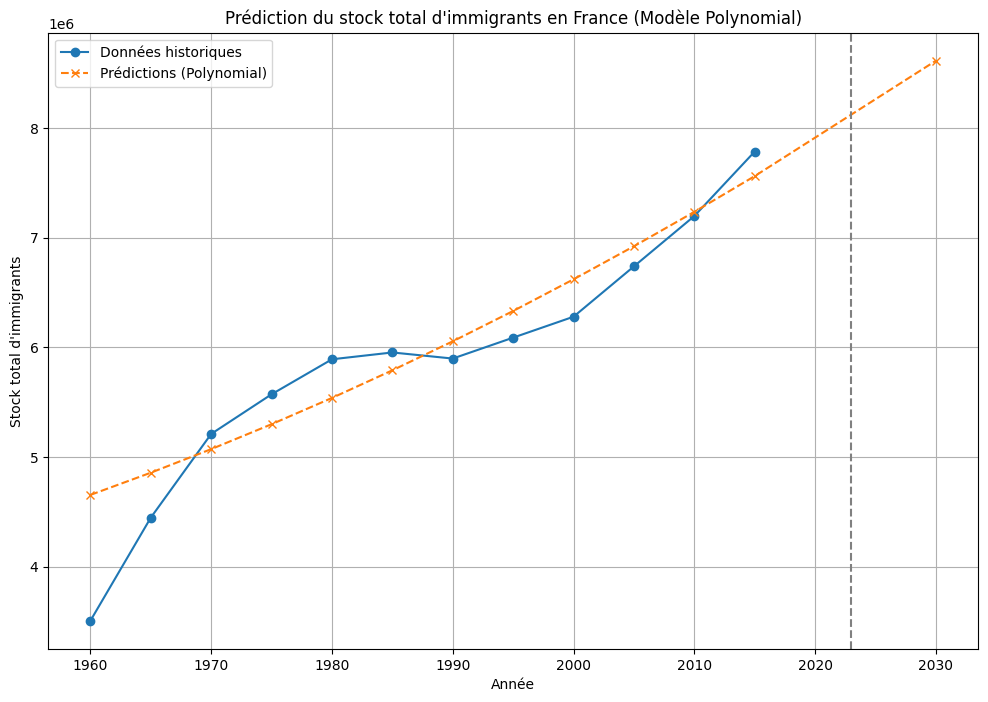

In [54]:
# Ajouter les prédictions du modèle polynomial aux données
france_data['Polynomial_Predicted'] = poly_model.predict(france_data[['Year']])

# Ajouter la prédiction pour 2030 aux données
future_prediction_poly = pd.DataFrame({'Year': [2030], 'Polynomial_Predicted': poly_prediction_2030})
combined_data_poly = pd.concat([france_data[['Year', 'International migrant stock, total', 'Polynomial_Predicted']], future_prediction_poly])

# Créer le graphique
plt.figure(figsize=(12, 8))
plt.plot(france_data['Year'], france_data['International migrant stock, total'], label='Données historiques', marker='o')
plt.plot(combined_data_poly['Year'], combined_data_poly['Polynomial_Predicted'], label='Prédictions (Polynomial)', linestyle='--', marker='x')
plt.axvline(x=2023, color='grey', linestyle='--')
plt.title('Prédiction du stock total d\'immigrants en France (Modèle Polynomial)')
plt.xlabel('Année')
plt.ylabel('Stock total d\'immigrants')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
avec forest aleatoire

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Créer et entraîner le modèle de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Évaluer le modèle
rf_score = rf_model.score(X_test, y_test)

# Faire la prédiction pour l'année 2030
rf_prediction_2030 = rf_model.predict(year_2030)

# Afficher les résultats
rf_score, rf_prediction_2030[0]


(0.7677029483499076, 7216220.01)

/tmp/ipykernel_33/1809383822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  france_data['RandomForest_Predicted'] = rf_model.predict(france_data[['Year']])


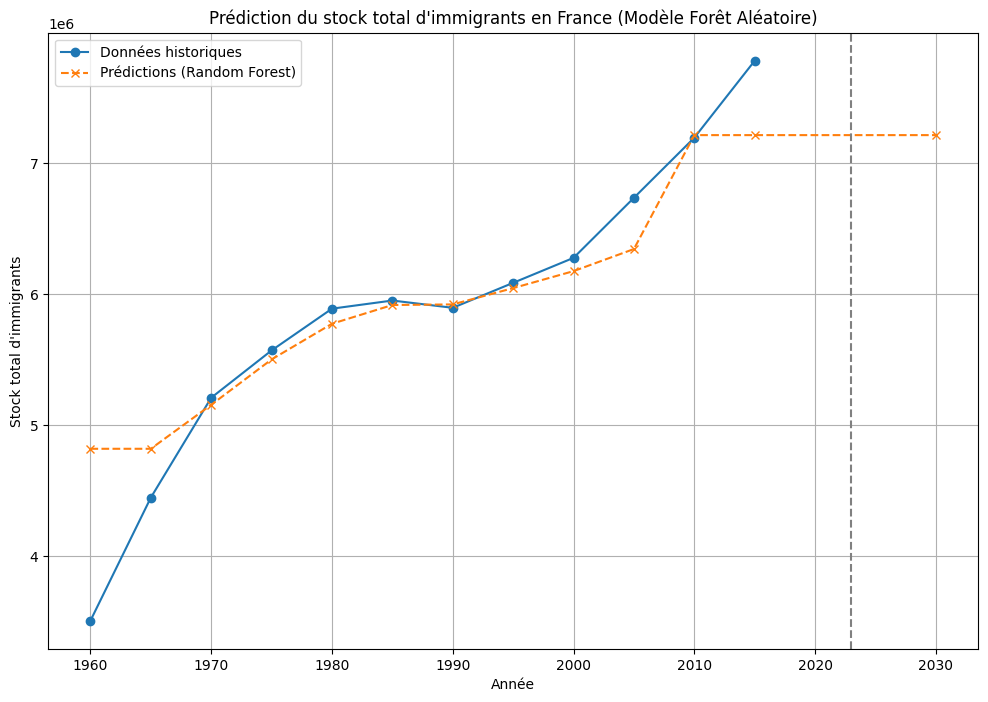

In [61]:
# Ajouter les prédictions du modèle de forêt aléatoire aux données
france_data['RandomForest_Predicted'] = rf_model.predict(france_data[['Year']])

# Ajouter la prédiction pour 2030 aux données
future_prediction_rf = pd.DataFrame({'Year': [2030], 'RandomForest_Predicted': rf_prediction_2030})
combined_data_rf = pd.concat([france_data[['Year', 'International migrant stock, total', 'RandomForest_Predicted']], future_prediction_rf])

# Créer le graphique
plt.figure(figsize=(12, 8))
plt.plot(france_data['Year'], france_data['International migrant stock, total'], label='Données historiques', marker='o')
plt.plot(combined_data_rf['Year'], combined_data_rf['RandomForest_Predicted'], label='Prédictions (Random Forest)', linestyle='--', marker='x')
plt.axvline(x=2023, color='grey', linestyle='--')
plt.title('Prédiction du stock total d\'immigrants en France (Modèle Forêt Aléatoire)')
plt.xlabel('Année')
plt.ylabel('Stock total d\'immigrants')
plt.legend()
plt.grid(True)
plt.show()


ARIMA MODEL

In [74]:
from statsmodels.tsa.arima.model import ARIMA

# Préparer les données pour le modèle ARIMA
arima_data = france_data.set_index('Year')['International migrant stock, total']

# Définir et entraîner le modèle ARIMA
arima_model = ARIMA(arima_data, order=(5, 1, 0))  # Les ordres (p,d,q) peuvent être ajustés selon les besoins
arima_model_fit = arima_model.fit()

# Faire la prédiction pour l'année 2030
forecast = arima_model_fit.forecast(steps=10)  # Prédire les 10 prochaines années à partir de 2020
arima_prediction_2030 = forecast.iloc[-1]

# Afficher les résultats
arima_prediction_2030


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

8361844.324409929

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


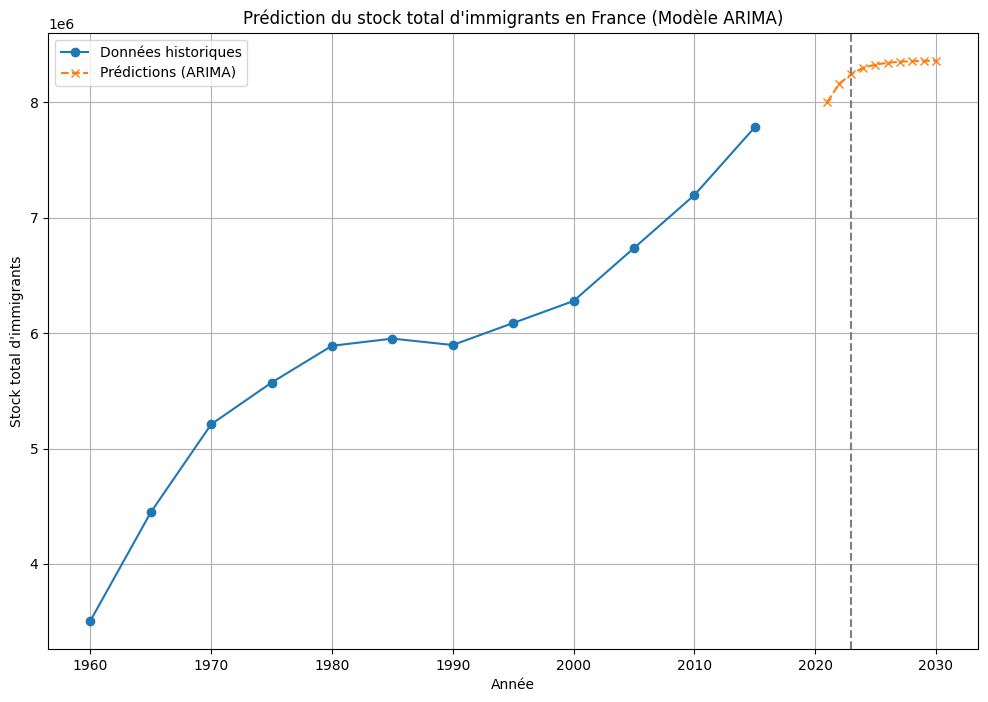

In [75]:
# Ajouter les prédictions du modèle ARIMA aux données historiques
forecast_years = list(range(2021, 2031))
forecast_values = arima_model_fit.forecast(steps=10)

# Créer un DataFrame pour les prédictions futures
future_predictions_arima = pd.DataFrame({
    'Year': forecast_years,
    'ARIMA_Predicted': forecast_values
})

# Combiner les données historiques avec les prédictions futures
combined_data_arima = pd.concat([
    france_data[['Year', 'International migrant stock, total']].set_index('Year'),
    future_predictions_arima.set_index('Year')
]).reset_index()

# Créer le graphique
plt.figure(figsize=(12, 8))
plt.plot(france_data['Year'], france_data['International migrant stock, total'], label='Données historiques', marker='o')
plt.plot(combined_data_arima['Year'], combined_data_arima['ARIMA_Predicted'], label='Prédictions (ARIMA)', linestyle='--', marker='x')
plt.axvline(x=2023, color='grey', linestyle='--')
plt.title('Prédiction du stock total d\'immigrants en France (Modèle ARIMA)')
plt.xlabel('Année')
plt.ylabel('Stock total d\'immigrants')
plt.legend()
plt.grid(True)
plt.show()
